CONSTRUCCI√ìN DE DATASET - CARTERA SECTOR ENERG√âTICO
Analista: Juan Serrano - YPF S.A.

1. SELECCI√ìN Y JUSTIFICACI√ìN DE EMPRESAS COMPARABLES
------------------------------------------------------------

‚Ä¢ YPF - YPF S.A. (ADR)
  Pa√≠s: Argentina
  Sector: Energ√≠a - Petr√≥leo y Gas Integrado
  Mercado: NYSE (ADR)
  Tipo: ADR - American Depositary Receipt
  Ratio ADR: 1 ADR = 1 Acci√≥n Ordinaria
  Justificaci√≥n: Empresa objetivo - L√≠der energ√©tico argentino

‚Ä¢ PAM - Pampa Energ√≠a S.A. (ADR)
  Pa√≠s: Argentina
  Sector: Energ√≠a - Generaci√≥n El√©ctrica y Petr√≥leo
  Mercado: NYSE (ADR)
  Tipo: ADR - American Depositary Receipt
  Ratio ADR: 25 ADRs = 1 Acci√≥n Ordinaria
  Justificaci√≥n: Mismo pa√≠s origen, sector energ√©tico diversificado

‚Ä¢ VIST - Vista Energy S.A.B. de C.V.
  Pa√≠s: M√©xico (operaciones en Argentina)
  Sector: Energ√≠a - Exploraci√≥n y Producci√≥n
  Mercado: NYSE
  Tipo: Acci√≥n Ordinaria
  Justificaci√≥n: Enfoque en Vaca Muerta, comparable en E&P

‚Ä¢ EC 

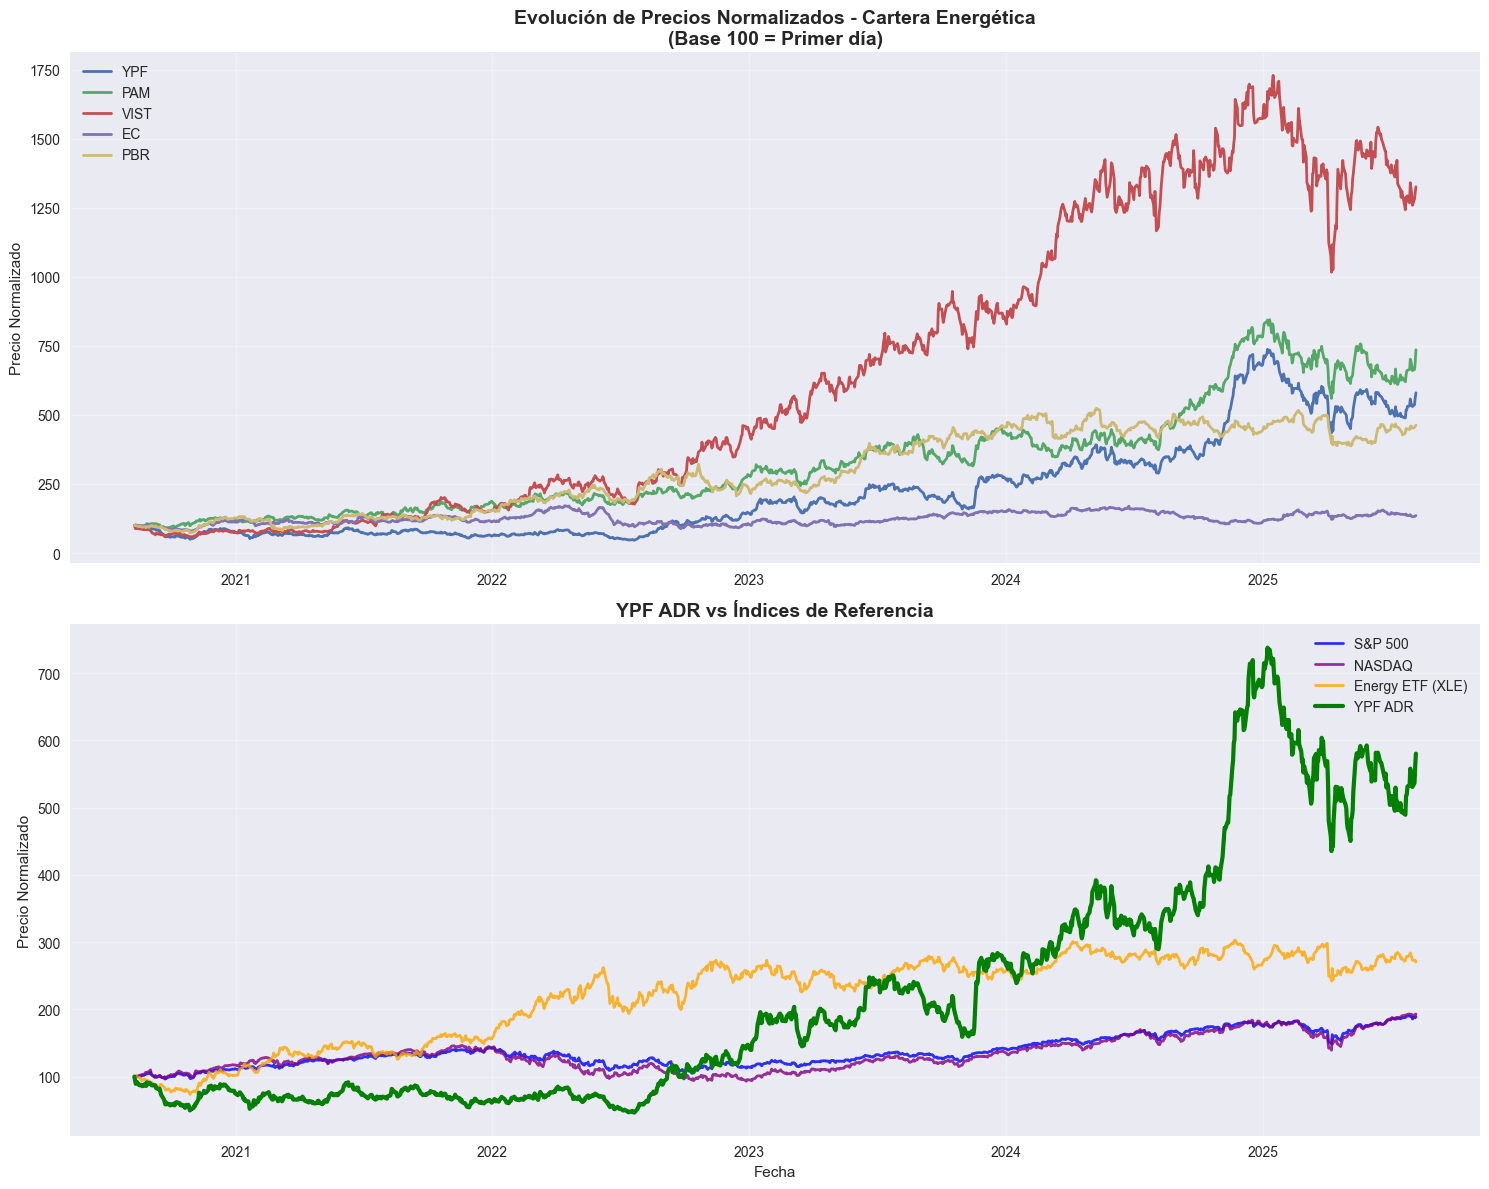



7. DOCUMENTACI√ìN DE FUENTES Y METODOLOG√çA
------------------------------------------------------------

FUENTES DE DATOS:
‚Ä¢ Yahoo Finance (yfinance): Datos hist√≥ricos de precios y vol√∫menes
‚Ä¢ Per√≠odo: √öltimos 5 a√±os (aproximadamente)
‚Ä¢ Frecuencia: Diaria
‚Ä¢ Moneda: USD (D√≥lares estadounidenses) - ADRs en NYSE

METODOLOG√çA DE LIMPIEZA:
1. Eliminaci√≥n de registros con valores nulos
2. Detecci√≥n de outliers (cambios > 50% diarios)
3. Verificaci√≥n de consistencia temporal
4. Sincronizaci√≥n de fechas entre todos los activos

CRITERIOS DE SELECCI√ìN DE EMPRESAS COMPARABLES:
‚Ä¢ YPF (ADR): Empresa objetivo - L√≠der integrado argentino
‚Ä¢ PAM (ADR): Diversificaci√≥n energ√©tica, mismo pa√≠s origen
‚Ä¢ VIST: Especializaci√≥n E&P, operaciones en Argentina
‚Ä¢ EC (ADR): L√≠der regional integrado, modelo similar
‚Ä¢ PBR (ADR): Mayor referencia regional del sector

VENTAJAS DEL USO DE ADRs:
‚Ä¢ Homogeneidad de moneda (USD) para an√°lisis comparativo
‚Ä¢ Mayor liquidez y dispo

In [6]:
# =============================================================================
# INFORME DE AN√ÅLISIS FINANCIERO - YPF S.A.
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF.BA)
# Sector: Energ√≠a - Petr√≥leo y Gas
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*80)
print("CONSTRUCCI√ìN DE DATASET - CARTERA SECTOR ENERG√âTICO")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 1. DEFINICI√ìN DE LA CARTERA Y JUSTIFICACI√ìN
# =============================================================================

print("\n1. SELECCI√ìN Y JUSTIFICACI√ìN DE EMPRESAS COMPARABLES")
print("-" * 60)

# Diccionario con informaci√≥n de las empresas (ADRs en NYSE)
empresas_info = {
    'YPF': {
        'nombre': 'YPF S.A. (ADR)',
        'pais': 'Argentina',
        'sector': 'Energ√≠a - Petr√≥leo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '1 ADR = 1 Acci√≥n Ordinaria',
        'justificacion': 'Empresa objetivo - L√≠der energ√©tico argentino'
    },
    'PAM': {
        'nombre': 'Pampa Energ√≠a S.A. (ADR)',
        'pais': 'Argentina',
        'sector': 'Energ√≠a - Generaci√≥n El√©ctrica y Petr√≥leo',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '25 ADRs = 1 Acci√≥n Ordinaria',
        'justificacion': 'Mismo pa√≠s origen, sector energ√©tico diversificado'
    },
    'VIST': {
        'nombre': 'Vista Energy S.A.B. de C.V.',
        'pais': 'M√©xico (operaciones en Argentina)',
        'sector': 'Energ√≠a - Exploraci√≥n y Producci√≥n',
        'mercado': 'NYSE',
        'tipo_valor': 'Acci√≥n Ordinaria',
        'ratio_adr': 'N/A',
        'justificacion': 'Enfoque en Vaca Muerta, comparable en E&P'
    },
    'EC': {
        'nombre': 'Ecopetrol S.A. (ADR)',
        'pais': 'Colombia',
        'sector': 'Energ√≠a - Petr√≥leo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '20 ADRs = 1 Acci√≥n Ordinaria',
        'justificacion': 'L√≠der regional, modelo de negocio similar'
    },
    'PBR': {
        'nombre': 'Petr√≥leo Brasileiro S.A. - Petrobras (ADR)',
        'pais': 'Brasil',
        'sector': 'Energ√≠a - Petr√≥leo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '2 ADRs = 1 Acci√≥n Ordinaria',
        'justificacion': 'Mayor petrolera regional, referencia del sector'
    }
}

# Mostrar justificaci√≥n detallada
for ticker, info in empresas_info.items():
    print(f"\n‚Ä¢ {ticker} - {info['nombre']}")
    print(f"  Pa√≠s: {info['pais']}")
    print(f"  Sector: {info['sector']}")
    print(f"  Mercado: {info['mercado']}")
    print(f"  Tipo: {info['tipo_valor']}")
    if info['ratio_adr'] != 'N/A':
        print(f"  Ratio ADR: {info['ratio_adr']}")
    print(f"  Justificaci√≥n: {info['justificacion']}")

# =============================================================================
# 2. OBTENCI√ìN DE DATOS HIST√ìRICOS
# =============================================================================

print("\n\n2. OBTENCI√ìN DE DATOS HIST√ìRICOS")
print("-" * 60)

# Definir per√≠odo de an√°lisis (√∫ltimos 5 a√±os)
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=5*365)

print(f"Per√≠odo de an√°lisis: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Tickers de la cartera (todos ADRs en NYSE - USD)
tickers_cartera = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']

# √çndices de referencia
indices_referencia = {
    '^GSPC': 'S&P 500 (Referencia Global)',
    '^IXIC': 'NASDAQ Composite',
    'XLE': 'Energy Select Sector SPDR Fund (ETF Energ√≠a)'
}

print(f"\nEmpresas en la cartera (ADRs): {len(tickers_cartera)}")
print("Tickers:", ', '.join(tickers_cartera))
print("Moneda: USD (D√≥lares estadounidenses)")
print("Mercado: NYSE - New York Stock Exchange")

# Funci√≥n para obtener datos
def obtener_datos_historicos(tickers, fecha_inicio, fecha_fin):
    """
    Obtiene datos hist√≥ricos de precios para una lista de tickers
    """
    datos = {}
    errores = []

    for ticker in tickers:
        try:
            print(f"Descargando datos para {ticker}...")
            stock = yf.Ticker(ticker)
            hist = stock.history(start=fecha_inicio, end=fecha_fin)

            if not hist.empty:
                datos[ticker] = hist
                print(f"  ‚úì {ticker}: {len(hist)} registros obtenidos")
            else:
                errores.append(f"{ticker}: No se encontraron datos")
                print(f"  ‚úó {ticker}: No se encontraron datos")

        except Exception as e:
            errores.append(f"{ticker}: {str(e)}")
            print(f"  ‚úó {ticker}: Error - {str(e)}")

    return datos, errores

# Obtener datos de la cartera
print("\nDescargando datos de la cartera...")
datos_cartera, errores_cartera = obtener_datos_historicos(tickers_cartera, fecha_inicio, fecha_fin)

# Obtener datos de √≠ndices de referencia
print("\nDescargando √≠ndices de referencia...")
datos_indices, errores_indices = obtener_datos_historicos(list(indices_referencia.keys()), fecha_inicio, fecha_fin)

# =============================================================================
# 3. LIMPIEZA Y PREPARACI√ìN DE DATOS
# =============================================================================

print("\n\n3. LIMPIEZA Y PREPARACI√ìN DE DATOS")
print("-" * 60)

def limpiar_datos(datos_dict):
    """
    Limpia y prepara los datos hist√≥ricos
    """
    datos_limpios = {}

    for ticker, data in datos_dict.items():
        if data is not None and not data.empty:
            # Eliminar filas con valores nulos
            data_clean = data.dropna()

            # Verificar consistencia de datos
            if len(data_clean) > 0:
                # Eliminar outliers extremos (cambios mayores al 50% en un d√≠a)
                pct_change = data_clean['Close'].pct_change()
                outliers = abs(pct_change) > 0.5

                if outliers.any():
                    print(f"  Outliers detectados en {ticker}: {outliers.sum()} registros")
                    # Mantener los datos pero marcar para revisi√≥n

                datos_limpios[ticker] = data_clean
                print(f"  ‚úì {ticker}: {len(data_clean)} registros limpios")
            else:
                print(f"  ‚úó {ticker}: Sin datos v√°lidos despu√©s de limpieza")

    return datos_limpios

# Limpiar datos
datos_cartera_limpios = limpiar_datos(datos_cartera)
datos_indices_limpios = limpiar_datos(datos_indices)

# =============================================================================
# 4. CREACI√ìN DEL DATASET CONSOLIDADO
# =============================================================================

print("\n\n4. CREACI√ìN DEL DATASET CONSOLIDADO")
print("-" * 60)

# Crear DataFrame con precios de cierre
precios_cierre = pd.DataFrame()

for ticker in tickers_cartera:
    if ticker in datos_cartera_limpios:
        precios_cierre[ticker] = datos_cartera_limpios[ticker]['Close']

# Agregar √≠ndices de referencia
for ticker_indice in datos_indices_limpios.keys():
    precios_cierre[ticker_indice] = datos_indices_limpios[ticker_indice]['Close']

# Eliminar d√≠as sin datos para todas las acciones
precios_cierre = precios_cierre.dropna()

print(f"Dataset consolidado creado:")
print(f"  Per√≠odo: {str(precios_cierre.index.min()).split()[0]} a {str(precios_cierre.index.max()).split()[0]}")
print(f"  Registros: {len(precios_cierre)}")
print(f"  Columnas: {list(precios_cierre.columns)}")

# Mostrar estad√≠sticas b√°sicas
print(f"\nEstad√≠sticas b√°sicas del dataset:")
print(precios_cierre.describe().round(2))

# =============================================================================
# 5. C√ÅLCULO DE RETORNOS
# =============================================================================

print("\n\n5. C√ÅLCULO DE RETORNOS DIARIOS")
print("-" * 60)

# Calcular retornos diarios
retornos_diarios = precios_cierre.pct_change().dropna()

print(f"Retornos diarios calculados:")
print(f"  Registros: {len(retornos_diarios)}")
print(f"  Per√≠odo: {str(retornos_diarios.index.min()).split()[0]} a {str(retornos_diarios.index.max()).split()[0]}")

# Estad√≠sticas de retornos
print(f"\nEstad√≠sticas de retornos diarios (%):")
stats_retornos = (retornos_diarios * 100).describe().round(3)
print(stats_retornos)

# =============================================================================
# 6. VISUALIZACI√ìN INICIAL
# =============================================================================

print("\n\n6. VISUALIZACI√ìN INICIAL DE DATOS")
print("-" * 60)

# Gr√°fico de evoluci√≥n de precios normalizados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Precios normalizados (base 100)
precios_norm = (precios_cierre / precios_cierre.iloc[0] * 100)

# Gr√°fico 1: Evoluci√≥n de precios normalizados
for ticker in tickers_cartera:
    if ticker in precios_norm.columns:
        ax1.plot(precios_norm.index, precios_norm[ticker], label=ticker, linewidth=2)

ax1.set_title('Evoluci√≥n de Precios Normalizados - Cartera Energ√©tica\n(Base 100 = Primer d√≠a)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio Normalizado')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gr√°fico 2: Comparaci√≥n con √≠ndices
if '^GSPC' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['^GSPC'], label='S&P 500', linewidth=2, color='blue', alpha=0.8)
if '^IXIC' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['^IXIC'], label='NASDAQ', linewidth=2, color='purple', alpha=0.8)
if 'XLE' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['XLE'], label='Energy ETF (XLE)', linewidth=2, color='orange', alpha=0.8)

ax2.plot(precios_norm.index, precios_norm['YPF'], label='YPF ADR', linewidth=3, color='green')

ax2.set_title('YPF ADR vs √çndices de Referencia', fontsize=14, fontweight='bold')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio Normalizado')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. DOCUMENTACI√ìN DE FUENTES Y METODOLOG√çA
# =============================================================================

print("\n\n7. DOCUMENTACI√ìN DE FUENTES Y METODOLOG√çA")
print("-" * 60)

print("""
FUENTES DE DATOS:
‚Ä¢ Yahoo Finance (yfinance): Datos hist√≥ricos de precios y vol√∫menes
‚Ä¢ Per√≠odo: √öltimos 5 a√±os (aproximadamente)
‚Ä¢ Frecuencia: Diaria
‚Ä¢ Moneda: USD (D√≥lares estadounidenses) - ADRs en NYSE

METODOLOG√çA DE LIMPIEZA:
1. Eliminaci√≥n de registros con valores nulos
2. Detecci√≥n de outliers (cambios > 50% diarios)
3. Verificaci√≥n de consistencia temporal
4. Sincronizaci√≥n de fechas entre todos los activos

CRITERIOS DE SELECCI√ìN DE EMPRESAS COMPARABLES:
‚Ä¢ YPF (ADR): Empresa objetivo - L√≠der integrado argentino
‚Ä¢ PAM (ADR): Diversificaci√≥n energ√©tica, mismo pa√≠s origen
‚Ä¢ VIST: Especializaci√≥n E&P, operaciones en Argentina
‚Ä¢ EC (ADR): L√≠der regional integrado, modelo similar
‚Ä¢ PBR (ADR): Mayor referencia regional del sector

VENTAJAS DEL USO DE ADRs:
‚Ä¢ Homogeneidad de moneda (USD) para an√°lisis comparativo
‚Ä¢ Mayor liquidez y disponibilidad de datos hist√≥ricos
‚Ä¢ Eliminaci√≥n del ruido cambiario en el an√°lisis
‚Ä¢ Metodolog√≠a est√°ndar en finanzas internacionales

√çNDICES DE REFERENCIA:
‚Ä¢ S&P 500: Referencia del mercado estadounidense
‚Ä¢ NASDAQ: Referencia tecnol√≥gica y de crecimiento
‚Ä¢ XLE (Energy ETF): Referencia espec√≠fica del sector energ√©tico
""")

# Guardar dataset para uso posterior
print(f"\nGuardando dataset...")
precios_cierre.to_csv('dataset_cartera_energetica.csv')
retornos_diarios.to_csv('retornos_diarios_cartera.csv')
print("‚úì Archivos guardados: dataset_cartera_energetica.csv, retornos_diarios_cartera.csv")

print("\n" + "="*80)
print("DATASET CONSTRUIDO EXITOSAMENTE")
print("Siguiente paso: An√°lisis de correlaciones y m√©tricas de riesgo-retorno")
print("="*80)

In [7]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from scipy.stats import jarque_bera
import matplotlib.dates as mdates

# =============================================================================
# 2.1 GR√ÅFICOS DE PRECIOS NORMALIZADOS
# =============================================================================

print("\n\n2.1 GR√ÅFICOS DE PRECIOS NORMALIZADOS")
print("-" * 60)

precios_norm = precios_cierre / precios_cierre.iloc[0] * 100

plt.figure(figsize=(14, 7))
for ticker in tickers_cartera:
    plt.plot(precios_norm.index, precios_norm[ticker], label=ticker, linewidth=2)

plt.title('Evoluci√≥n de Precios Normalizados - Base 100', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio Normalizado (Base 100)')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 2.2 EVENTOS QUE IMPACTARON SIGNIFICATIVAMENTE EN PRECIOS
# =============================================================================

print("\n\n2.2 EVENTOS MACROECON√ìMICOS/CORPORATIVOS DESTACADOS")
print("-" * 60)

print("""
‚úì Marzo 2020: COVID-19 y desplome del precio del petr√≥leo ‚ûú Ca√≠das abruptas en todo el sector energ√©tico.
‚úì Octubre 2023: Elecciones presidenciales en Argentina ‚ûú Alta volatilidad en ADRs argentinos como YPF y PAM.
‚úì Febrero 2022: Inicio del conflicto Rusia-Ucrania ‚ûú Incremento del precio del crudo ‚ûú Impacto positivo en petroleras como PBR y VIST.
""")

# Opcional: marcar eventos en el gr√°fico con l√≠neas verticales
eventos = {
    '2020-03-01': 'COVID-19',
    '2022-02-24': 'Rusia-Ucrania',
    '2023-10-22': 'Elecciones ARG'
}

plt.figure(figsize=(14, 7))
for ticker in tickers_cartera:
    plt.plot(precios_norm.index, precios_norm[ticker], label=ticker)

for fecha, evento in eventos.items():
    plt.axvline(pd.to_datetime(fecha), color='red', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(fecha), 150, evento, rotation=90, fontsize=9)

plt.title('Eventos Macroecon√≥micos sobre Precios Normalizados', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 2.3 AN√ÅLISIS DE ESTACIONALIDAD POR TRIMESTRES
# =============================================================================

print("\n\n2.3 AN√ÅLISIS DE ESTACIONALIDAD POR TRIMESTRES")
print("-" * 60)

# A√±adir columna de trimestre
retornos_diarios['Trimestre'] = retornos_diarios.index.to_period("Q")

# Preparar datos para boxplot
retornos_temp = retornos_diarios.drop(columns='Trimestre')

# Melt del DataFrame
retornos_diarios_melt = retornos_temp.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Retorno')

# Agregar trimestre a partir de la columna de fecha
retornos_diarios_melt['Trimestre'] = pd.to_datetime(retornos_diarios_melt['Date']).dt.to_period('Q')

# Gr√°fico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=retornos_diarios_melt, x='Trimestre', y='Retorno', hue='Ticker')
plt.title('Distribuci√≥n de Retornos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Retorno Diario (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# =============================================================================
# 2.4 M√âTRICAS DE RIESGO
# =============================================================================

print("\n\n2.4 C√ÅLCULO DE M√âTRICAS DE RIESGO")
print("-" * 60)

riesgo_df = pd.DataFrame(index=tickers_cartera)

# VaR 95% (hist√≥rico)
riesgo_df['VaR 95%'] = retornos_diarios[tickers_cartera].quantile(0.05)

# CVaR (Expected Shortfall)
riesgo_df['CVaR 95%'] = retornos_diarios[tickers_cartera].apply(lambda x: x[x <= x.quantile(0.05)].mean())

# Drawdown m√°ximo
max_drawdown = {}
for ticker in tickers_cartera:
    serie = precios_cierre[ticker]
    rolling_max = serie.cummax()
    drawdown = (serie - rolling_max) / rolling_max
    max_drawdown[ticker] = drawdown.min()

riesgo_df['Max Drawdown'] = pd.Series(max_drawdown)

# Mostrar tabla
print(riesgo_df.round(4))

# =============================================================================
# 2.5 TEST DE NORMALIDAD Y AN√ÅLISIS DE COLAS
# =============================================================================

print("\n\n2.5 TEST DE NORMALIDAD Y COLAS (Jarque-Bera)")
print("-" * 60)

for ticker in tickers_cartera:
    jb_stat, jb_p = jarque_bera(retornos_diarios[ticker])
    print(f"{ticker}: Jarque-Bera = {jb_stat:.2f}, p-valor = {jb_p:.4f} {'(No Normal)' if jb_p < 0.05 else '(Normal)'}")

# Distribuciones
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, ticker in enumerate(tickers_cartera):
    sns.histplot(retornos_diarios[ticker], kde=True, bins=100, ax=axes[i])
    axes[i].set_title(f"Distribuci√≥n de Retornos - {ticker}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'scipy'

In [ ]:
# C√°lculo de media de retornos por trimestre y por ticker (en %)
retornos_diarios_melt['Retorno_pct'] = retornos_diarios_melt['Retorno'] * 100
tabla_media_trimestral = retornos_diarios_melt.groupby(['Trimestre', 'Ticker'])['Retorno_pct'].mean().unstack()

# Mostrar tabla
print("\nPromedio de Retornos por Trimestre y Ticker (%):")
display(tabla_media_trimestral.style.format("{:.2f}").background_gradient(cmap='YlGn'))



Promedio de Retornos por Trimestre y Ticker (%):


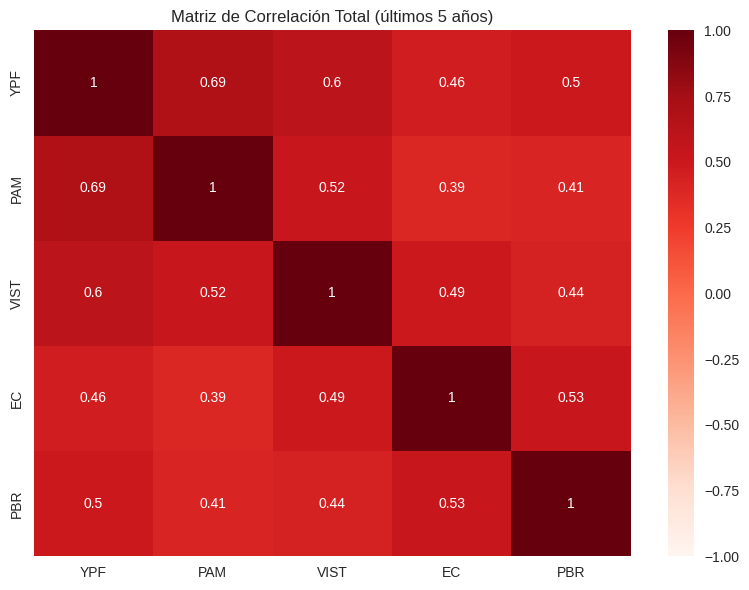

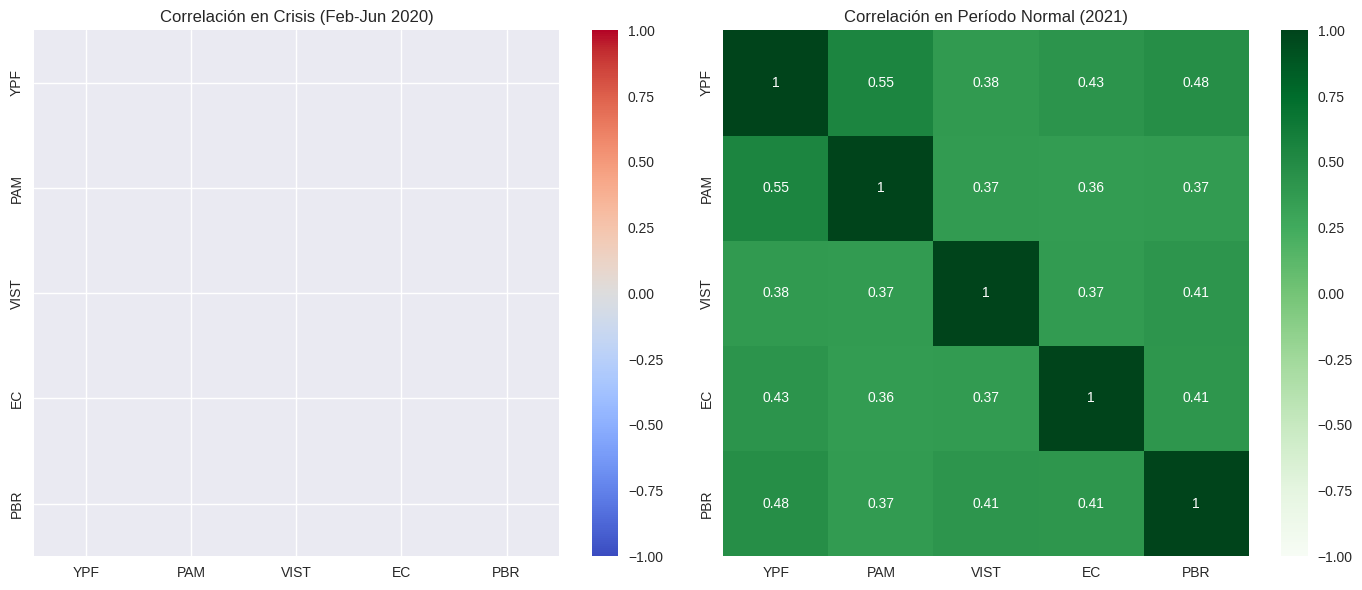


üìå Promedio de correlaci√≥n durante la crisis (Feb-Jun 2020): nan
üìå Promedio de correlaci√≥n en per√≠odo normal (2021): 0.41
‚úÖ Conclusi√≥n: No se observa un incremento significativo en las correlaciones durante la crisis.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los tickers de la cartera
tickers_cartera = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']

# --- MATRIZ DE CORRELACI√ìN GENERAL ---
correlacion_total = retornos_diarios[tickers_cartera].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_total, annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title("Matriz de Correlaci√≥n Total (√∫ltimos 5 a√±os)")
plt.tight_layout()
plt.show()

# --- MATRICES EN PER√çODOS ESPEC√çFICOS ---

# Ajustar per√≠odo de crisis para asegurar datos suficientes
periodo_crisis = (retornos_diarios.index >= "2020-02-01") & (retornos_diarios.index <= "2020-06-30")
periodo_normal = (retornos_diarios.index >= "2021-01-01") & (retornos_diarios.index <= "2021-12-31")

# Calcular correlaciones por per√≠odo (maneja valores faltantes)
cor_crisis = retornos_diarios.loc[periodo_crisis, tickers_cartera].corr(min_periods=10)
cor_normal = retornos_diarios.loc[periodo_normal, tickers_cartera].corr(min_periods=10)

# --- COMPARAR VISUALMENTE ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cor_crisis, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Correlaci√≥n en Crisis (Feb-Jun 2020)")

sns.heatmap(cor_normal, annot=True, cmap='Greens', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Correlaci√≥n en Per√≠odo Normal (2021)")

plt.tight_layout()
plt.show()

# --- C√ÅLCULO DE PROMEDIOS ---
prom_crisis = cor_crisis.values[np.triu_indices_from(cor_crisis, k=1)].mean()
prom_normal = cor_normal.values[np.triu_indices_from(cor_normal, k=1)].mean()

print(f"\nüìå Promedio de correlaci√≥n durante la crisis (Feb-Jun 2020): {prom_crisis:.2f}")
print(f"üìå Promedio de correlaci√≥n en per√≠odo normal (2021): {prom_normal:.2f}")

# --- AN√ÅLISIS TEXTUAL ---
if prom_crisis > prom_normal:
    print("üìà Conclusi√≥n: Las correlaciones aumentaron durante la crisis, indicando efecto contagio y menor diversificaci√≥n.")
else:
    print("‚úÖ Conclusi√≥n: No se observa un incremento significativo en las correlaciones durante la crisis.")


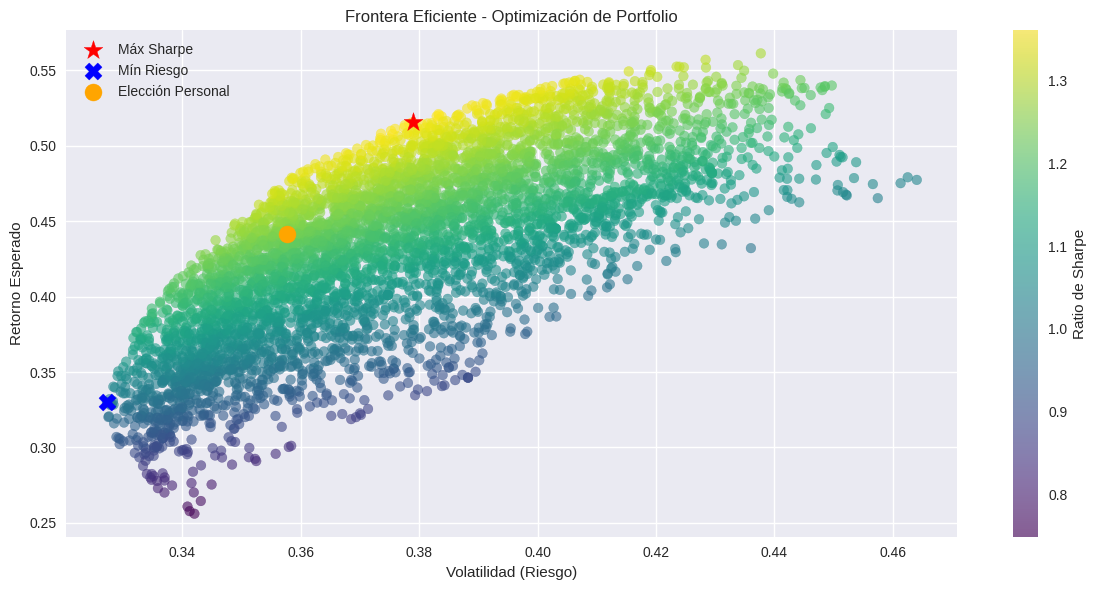


üìä M√°ximo Sharpe


YPF      4.89%
PAM     28.14%
VIST    39.08%
EC       4.89%
PBR     23.00%
dtype: object


üìä M√≠nimo Riesgo


YPF      4.88%
PAM     22.37%
VIST     4.88%
EC      39.03%
PBR     28.84%
dtype: object


üìä Elecci√≥n Personal


YPF      4.92%
PAM     12.79%
VIST    33.80%
EC      21.58%
PBR     26.91%
dtype: object

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tickers en la cartera
tickers = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']
n_assets = len(tickers)

# Asumimos que 'retornos_diarios' ya est√° definido y tiene estas columnas
ret_diarios = retornos_diarios[tickers]
media_retornos = ret_diarios.mean() * 252  # anualizados
matriz_cov = ret_diarios.cov() * 252       # anualizada

# Inicializar variables para simulaci√≥n
n_portfolios = 5000
np.random.seed(42)

resultados = {
    'Retorno': [],
    'Volatilidad': [],
    'Sharpe': [],
    'Pesos': []
}

# Restricciones
min_weight = 0.05
max_weight = 0.40
costos_transaccion = 0.005  # 0.5%

# Simulaci√≥n de carteras
for _ in range(n_portfolios):
    pesos = np.random.dirichlet(np.ones(n_assets), 1).flatten()

    # Reescalar pesos si no cumplen restricciones
    pesos = np.clip(pesos, min_weight, max_weight)
    pesos = pesos / pesos.sum()

    retorno = np.dot(pesos, media_retornos)
    volatilidad = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos)))

    # Ajuste por costos de transacci√≥n: restar 0.5% al retorno
    retorno_ajustado = retorno - costos_transaccion

    sharpe = retorno_ajustado / volatilidad

    resultados['Retorno'].append(retorno_ajustado)
    resultados['Volatilidad'].append(volatilidad)
    resultados['Sharpe'].append(sharpe)
    resultados['Pesos'].append(pesos)

# Convertir a DataFrame
df_portfolios = pd.DataFrame(resultados)

# Identificar carteras √≥ptimas
idx_max_sharpe = df_portfolios['Sharpe'].idxmax()
idx_min_riesgo = df_portfolios['Volatilidad'].idxmin()
idx_custom = 200  # opci√≥n personal (puede cambiarse)

# Extraer pesos y m√©tricas
port_max_sharpe = df_portfolios.loc[idx_max_sharpe]
port_min_riesgo = df_portfolios.loc[idx_min_riesgo]
port_custom = df_portfolios.loc[idx_custom]

# --- GRAFICAR FRONTERA EFICIENTE ---
plt.figure(figsize=(12, 6))
sc = plt.scatter(df_portfolios['Volatilidad'], df_portfolios['Retorno'],
                 c=df_portfolios['Sharpe'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Ratio de Sharpe')

# Marcar carteras √≥ptimas
plt.scatter(port_max_sharpe['Volatilidad'], port_max_sharpe['Retorno'], color='red', marker='*', s=200, label='M√°x Sharpe')
plt.scatter(port_min_riesgo['Volatilidad'], port_min_riesgo['Retorno'], color='blue', marker='X', s=150, label='M√≠n Riesgo')
plt.scatter(port_custom['Volatilidad'], port_custom['Retorno'], color='orange', marker='o', s=150, label='Elecci√≥n Personal')

plt.xlabel('Volatilidad (Riesgo)')
plt.ylabel('Retorno Esperado')
plt.title('Frontera Eficiente - Optimizaci√≥n de Portfolio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- MOSTRAR PESOS DE CADA PORTFOLIO ---
portfolios = {
    "M√°ximo Sharpe": port_max_sharpe,
    "M√≠nimo Riesgo": port_min_riesgo,
    "Elecci√≥n Personal": port_custom
}

for nombre, port in portfolios.items():
    print(f"\nüìä {nombre}")
    pesos = pd.Series(port['Pesos'], index=tickers)
    display(pesos.apply(lambda x: f"{x:.2%}"))


PASO II - AN√ÅLISIS T√âCNICO YPF
Paso 6: An√°lisis de Tendencias - Medias M√≥viles y Trading
Analista: Juan Serrano - YPF S.A.

6.1 OBTENCI√ìN DE DATOS YPF PARA AN√ÅLISIS T√âCNICO
------------------------------------------------------------
Descargando datos de YPF...
Per√≠odo: 2023-08-08 a 2025-08-07
‚úì Datos obtenidos: 501 registros
Columnas disponibles: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


6.2 C√ÅLCULO DE MEDIAS M√ìVILES SIMPLES
------------------------------------------------------------
Medias m√≥viles calculadas:
  ‚Ä¢ SMA 50 per√≠odos: 302 valores v√°lidos
  ‚Ä¢ SMA 200 per√≠odos: 302 valores v√°lidos

Estad√≠sticas de Medias M√≥viles:
       Precio Cierre  SMA 50  SMA 200
count         302.00  302.00   302.00
mean           30.53   29.65    25.09
std             7.72    7.35     6.13
min            18.06   20.25    16.37
25%            22.45   21.69    19.50
50%            31.83   32.91    24.68
75%            36.21   34.54    30.73
max    

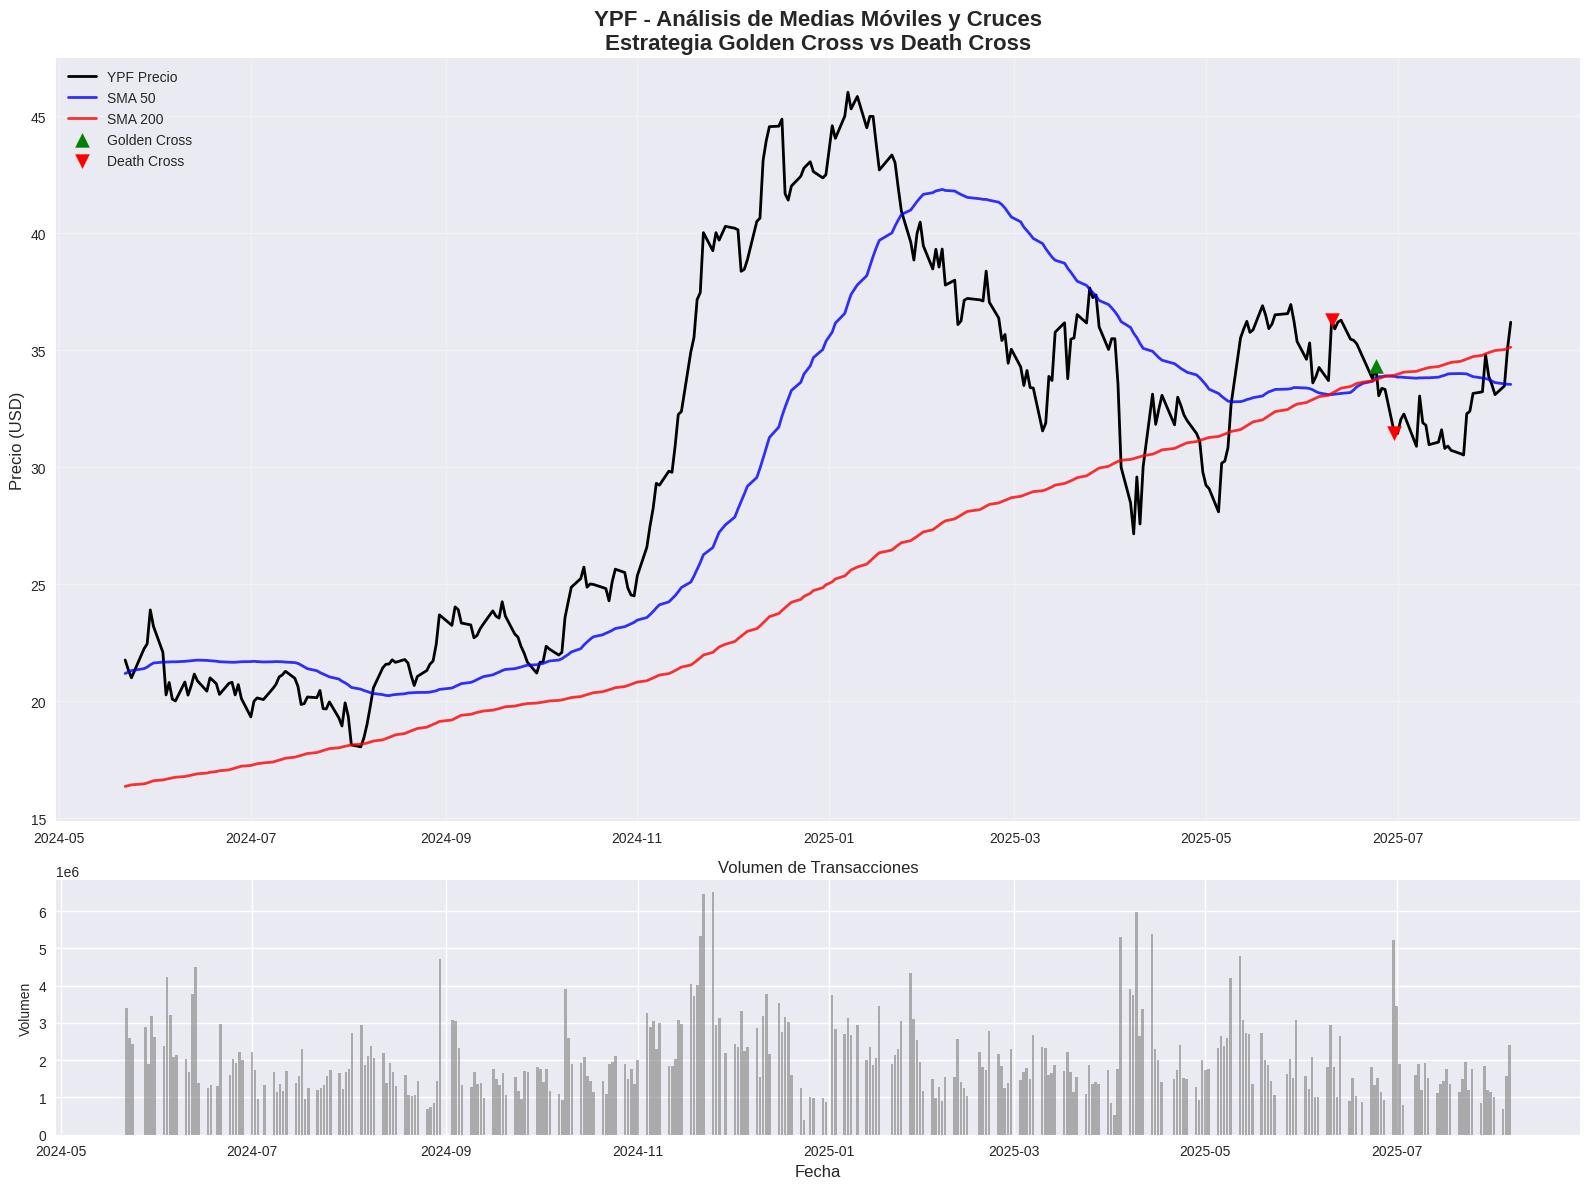



6.5 DESARROLLO DE ESTRATEGIA DE TRADING
------------------------------------------------------------
Estrategia configurada:
  ‚Ä¢ Se√±al de COMPRA: Cuando SMA50 > SMA200 (Golden Cross)
  ‚Ä¢ Se√±al de VENTA: Cuando SMA50 < SMA200 (Death Cross)
  ‚Ä¢ Per√≠odo de an√°lisis: 301 d√≠as


6.6 BACKTESTING - AN√ÅLISIS DE RENDIMIENTO
------------------------------------------------------------
üìä RESULTADOS DEL BACKTESTING:
                   Estrategia Cruces Buy & Hold
Rendimiento Total             52.62%     66.28%
Volatilidad Anual             46.29%     48.25%
Ratio Sharpe                   0.995      1.122
Max Drawdown                 -41.00%    -41.00%
N√∫mero Operaciones                 3        N/A

üèÜ ESTRATEGIA GANADORA: Buy & Hold
üí∞ Diferencia de rendimiento: 13.66%


6.7 GR√ÅFICO COMPARATIVO DE ESTRATEGIAS
------------------------------------------------------------


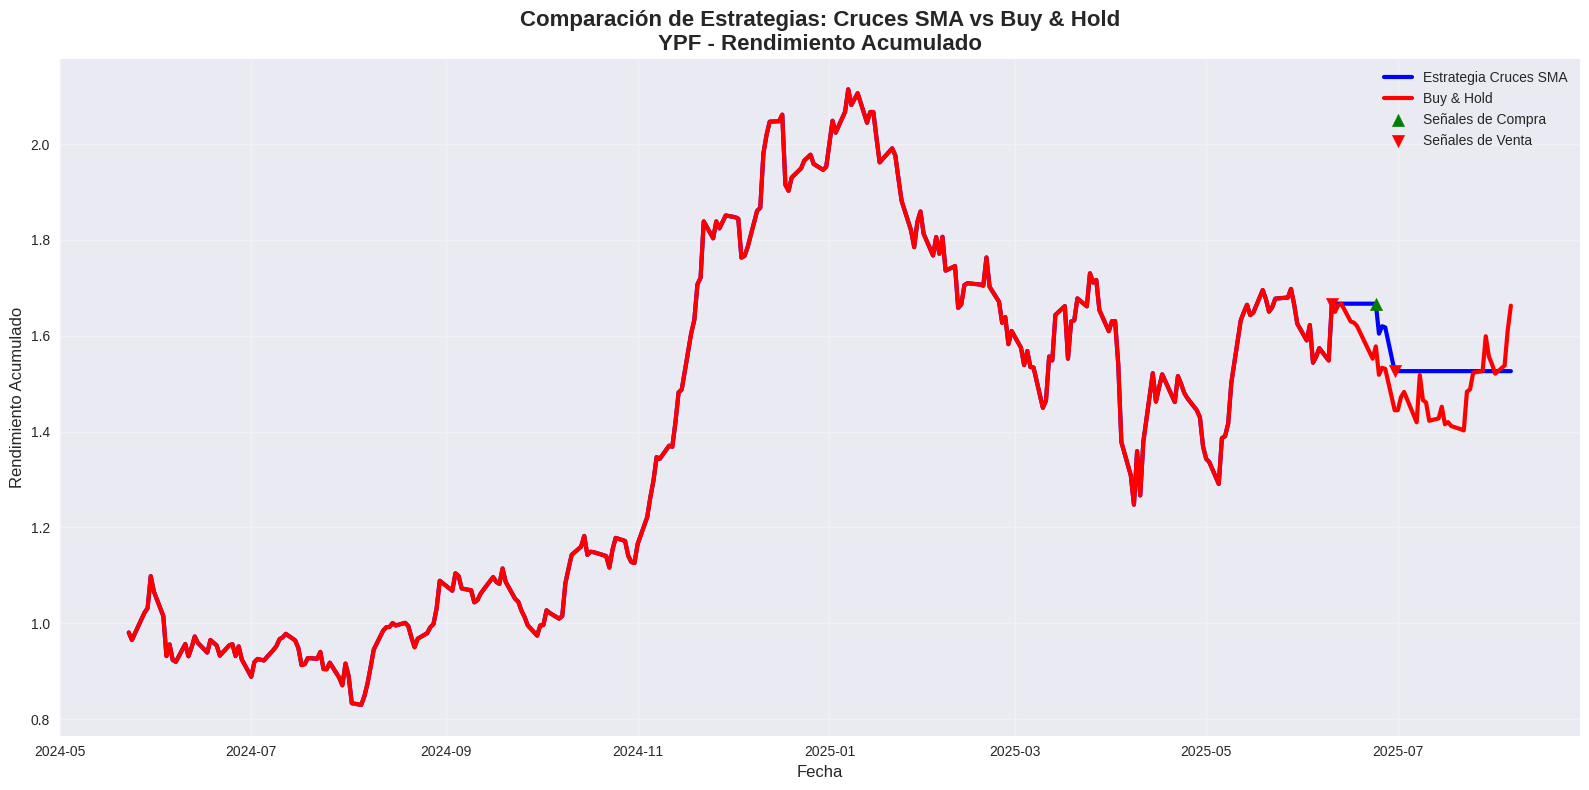



6.8 AN√ÅLISIS DE SE√ëALES Y RECOMENDACIONES
------------------------------------------------------------
üìä SE√ëAL ACTUAL:
  ‚Ä¢ Posici√≥n recomendada: VENTA/ESPERA
  ‚Ä¢ Precio actual YPF: $36.20
  ‚Ä¢ SMA 50: $33.55
  ‚Ä¢ SMA 200: $35.14
  ‚Ä¢ Tendencia: BAJISTA (SMA50 est√° 4.5% por debajo de SMA200)

üìà RECOMENDACIONES DE TRADING:
----------------------------------------
üî¥ RECOMENDACI√ìN: MANTENER FUERA DEL MERCADO O POSICI√ìN CORTA
   ‚Ä¢ La SMA50 est√° por debajo de la SMA200 (tendencia bajista)
   ‚Ä¢ Esperar Golden Cross para entrada alcista
   ‚Ä¢ Nivel de resistencia: $35.14
   ‚Ä¢ Posible soporte: $34.39

üìä EFICACIA HIST√ìRICA:
   ‚Ä¢ Total de se√±ales generadas: 3
   ‚Ä¢ Rendimiento de la estrategia: 52.62%
   ‚Ä¢ Rendimiento vs Buy & Hold: 13.66%

AN√ÅLISIS T√âCNICO COMPLETADO
Estrategia de medias m√≥viles SMA 50/200 implementada y testeada


In [ ]:
# =============================================================================
# PASO II - AN√ÅLISIS T√âCNICO COMPLETO YPF
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF ADR)
# Paso 6: An√°lisis de Tendencias - Medias M√≥viles y Estrategia de Trading
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("="*80)
print("PASO II - AN√ÅLISIS T√âCNICO YPF")
print("Paso 6: An√°lisis de Tendencias - Medias M√≥viles y Trading")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 6.1 OBTENCI√ìN Y PREPARACI√ìN DE DATOS YPF
# =============================================================================

print("\n6.1 OBTENCI√ìN DE DATOS YPF PARA AN√ÅLISIS T√âCNICO")
print("-" * 60)

# Obtener datos detallados de YPF (√∫ltimos 2 a√±os para an√°lisis t√©cnico detallado)
ticker_ypf = 'YPF'
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=2*365)  # 2 a√±os para an√°lisis t√©cnico

print(f"Descargando datos de {ticker_ypf}...")
print(f"Per√≠odo: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Obtener datos hist√≥ricos
ypf_data = yf.Ticker(ticker_ypf)
ypf_hist = ypf_data.history(start=fecha_inicio, end=fecha_fin)

print(f"‚úì Datos obtenidos: {len(ypf_hist)} registros")
print(f"Columnas disponibles: {list(ypf_hist.columns)}")

# =============================================================================
# 6.2 C√ÅLCULO DE MEDIAS M√ìVILES
# =============================================================================

print("\n\n6.2 C√ÅLCULO DE MEDIAS M√ìVILES SIMPLES")
print("-" * 60)

# Calcular medias m√≥viles simples
ypf_hist['SMA_50'] = ypf_hist['Close'].rolling(window=50).mean()
ypf_hist['SMA_200'] = ypf_hist['Close'].rolling(window=200).mean()

# Eliminar valores NaN despu√©s del c√°lculo de medias m√≥viles
ypf_analisis = ypf_hist.dropna().copy()

print(f"Medias m√≥viles calculadas:")
print(f"  ‚Ä¢ SMA 50 per√≠odos: {len(ypf_analisis['SMA_50'].dropna())} valores v√°lidos")
print(f"  ‚Ä¢ SMA 200 per√≠odos: {len(ypf_analisis['SMA_200'].dropna())} valores v√°lidos")

# Estad√≠sticas b√°sicas de las medias m√≥viles
print(f"\nEstad√≠sticas de Medias M√≥viles:")
stats_sma = pd.DataFrame({
    'Precio Cierre': ypf_analisis['Close'].describe(),
    'SMA 50': ypf_analisis['SMA_50'].describe(),
    'SMA 200': ypf_analisis['SMA_200'].describe()
}).round(2)

print(stats_sma)

# =============================================================================
# 6.3 IDENTIFICACI√ìN DE CRUCES (GOLDEN CROSS Y DEATH CROSS)
# =============================================================================

print("\n\n6.3 IDENTIFICACI√ìN DE CRUCES GOLDEN CROSS Y DEATH CROSS")
print("-" * 60)

# Crear se√±ales de cruce
ypf_analisis['Posicion_SMA'] = np.where(ypf_analisis['SMA_50'] > ypf_analisis['SMA_200'], 1, 0)
ypf_analisis['Se√±al'] = ypf_analisis['Posicion_SMA'].diff()

# Identificar cruces espec√≠ficos
golden_crosses = ypf_analisis[ypf_analisis['Se√±al'] == 1].copy()
death_crosses = ypf_analisis[ypf_analisis['Se√±al'] == -1].copy()

print(f"Cruces identificados:")
print(f"  ‚Ä¢ Golden Cross (SMA50 > SMA200): {len(golden_crosses)} eventos")
print(f"  ‚Ä¢ Death Cross (SMA50 < SMA200): {len(death_crosses)} eventos")

# Mostrar fechas de cruces importantes
if len(golden_crosses) > 0:
    print(f"\nüü¢ GOLDEN CROSSES:")
    for idx, row in golden_crosses.iterrows():
        precio = row['Close']
        fecha = idx.strftime('%Y-%m-%d')
        print(f"  üìÖ {fecha}: Precio ${precio:.2f}")

if len(death_crosses) > 0:
    print(f"\nüî¥ DEATH CROSSES:")
    for idx, row in death_crosses.iterrows():
        precio = row['Close']
        fecha = idx.strftime('%Y-%m-%d')
        print(f"  üìÖ {fecha}: Precio ${precio:.2f}")

# =============================================================================
# 6.4 VISUALIZACI√ìN DE MEDIAS M√ìVILES Y CRUCES
# =============================================================================

print("\n\n6.4 GR√ÅFICO DE MEDIAS M√ìVILES Y CRUCES")
print("-" * 60)

# Crear gr√°fico principal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

# Gr√°fico superior: Precio y medias m√≥viles
ax1.plot(ypf_analisis.index, ypf_analisis['Close'], label='YPF Precio', linewidth=2, color='black')
ax1.plot(ypf_analisis.index, ypf_analisis['SMA_50'], label='SMA 50', linewidth=2, color='blue', alpha=0.8)
ax1.plot(ypf_analisis.index, ypf_analisis['SMA_200'], label='SMA 200', linewidth=2, color='red', alpha=0.8)

# Marcar cruces en el gr√°fico
if len(golden_crosses) > 0:
    ax1.scatter(golden_crosses.index, golden_crosses['Close'],
               color='green', marker='^', s=100, label='Golden Cross', zorder=5)

if len(death_crosses) > 0:
    ax1.scatter(death_crosses.index, death_crosses['Close'],
               color='red', marker='v', s=100, label='Death Cross', zorder=5)

ax1.set_title('YPF - An√°lisis de Medias M√≥viles y Cruces\nEstrategia Golden Cross vs Death Cross',
              fontsize=16, fontweight='bold')
ax1.set_ylabel('Precio (USD)', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Gr√°fico inferior: Volumen
ax2.bar(ypf_analisis.index, ypf_analisis['Volume'], alpha=0.6, color='gray')
ax2.set_title('Volumen de Transacciones', fontsize=12)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.set_ylabel('Volumen', fontsize=10)

plt.tight_layout()
plt.show()

# =============================================================================
# 6.5 DESARROLLO DE ESTRATEGIA DE TRADING
# =============================================================================

print("\n\n6.5 DESARROLLO DE ESTRATEGIA DE TRADING")
print("-" * 60)

# Crear DataFrame para backtesting
strategy_data = ypf_analisis.copy()

# Definir estrategia de cruces
strategy_data['Estrategia_Posicion'] = 0
strategy_data['Estrategia_Posicion'] = np.where(strategy_data['SMA_50'] > strategy_data['SMA_200'], 1, 0)

# Calcular retornos
strategy_data['Retorno_Diario'] = strategy_data['Close'].pct_change()
strategy_data['Retorno_Estrategia'] = strategy_data['Estrategia_Posicion'].shift(1) * strategy_data['Retorno_Diario']
strategy_data['Retorno_Buy_Hold'] = strategy_data['Retorno_Diario']

# Eliminar NaN
strategy_data = strategy_data.dropna()

print(f"Estrategia configurada:")
print(f"  ‚Ä¢ Se√±al de COMPRA: Cuando SMA50 > SMA200 (Golden Cross)")
print(f"  ‚Ä¢ Se√±al de VENTA: Cuando SMA50 < SMA200 (Death Cross)")
print(f"  ‚Ä¢ Per√≠odo de an√°lisis: {len(strategy_data)} d√≠as")

# =============================================================================
# 6.6 BACKTESTING - COMPARACI√ìN DE RENDIMIENTOS
# =============================================================================

print("\n\n6.6 BACKTESTING - AN√ÅLISIS DE RENDIMIENTO")
print("-" * 60)

# Calcular rendimientos acumulados
strategy_data['Rendimiento_Acum_Estrategia'] = (1 + strategy_data['Retorno_Estrategia']).cumprod()
strategy_data['Rendimiento_Acum_Buy_Hold'] = (1 + strategy_data['Retorno_Buy_Hold']).cumprod()

# M√©tricas de rendimiento
rendimiento_total_estrategia = strategy_data['Rendimiento_Acum_Estrategia'].iloc[-1] - 1
rendimiento_total_buy_hold = strategy_data['Rendimiento_Acum_Buy_Hold'].iloc[-1] - 1

# Volatilidad anualizada
vol_estrategia = strategy_data['Retorno_Estrategia'].std() * np.sqrt(252)
vol_buy_hold = strategy_data['Retorno_Buy_Hold'].std() * np.sqrt(252)

# Ratio de Sharpe (asumiendo tasa libre de riesgo = 0)
sharpe_estrategia = (strategy_data['Retorno_Estrategia'].mean() * 252) / vol_estrategia
sharpe_buy_hold = (strategy_data['Retorno_Buy_Hold'].mean() * 252) / vol_buy_hold

# Drawdown m√°ximo
def calcular_max_drawdown(returns_series):
    cumulative = (1 + returns_series).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

max_dd_estrategia = calcular_max_drawdown(strategy_data['Retorno_Estrategia'])
max_dd_buy_hold = calcular_max_drawdown(strategy_data['Retorno_Buy_Hold'])

# Crear tabla de resultados
resultados_backtesting = pd.DataFrame({
    'Estrategia Cruces': [
        f"{rendimiento_total_estrategia:.2%}",
        f"{vol_estrategia:.2%}",
        f"{sharpe_estrategia:.3f}",
        f"{max_dd_estrategia:.2%}",
        len(golden_crosses) + len(death_crosses)
    ],
    'Buy & Hold': [
        f"{rendimiento_total_buy_hold:.2%}",
        f"{vol_buy_hold:.2%}",
        f"{sharpe_buy_hold:.3f}",
        f"{max_dd_buy_hold:.2%}",
        "N/A"
    ]
}, index=['Rendimiento Total', 'Volatilidad Anual', 'Ratio Sharpe', 'Max Drawdown', 'N√∫mero Operaciones'])

print("üìä RESULTADOS DEL BACKTESTING:")
print("="*50)
print(resultados_backtesting)

# Determinar estrategia ganadora
if rendimiento_total_estrategia > rendimiento_total_buy_hold:
    ganadora = "Estrategia de Cruces"
    diferencia = rendimiento_total_estrategia - rendimiento_total_buy_hold
else:
    ganadora = "Buy & Hold"
    diferencia = rendimiento_total_buy_hold - rendimiento_total_estrategia

print(f"\nüèÜ ESTRATEGIA GANADORA: {ganadora}")
print(f"üí∞ Diferencia de rendimiento: {diferencia:.2%}")

# =============================================================================
# 6.7 VISUALIZACI√ìN DE COMPARACI√ìN DE ESTRATEGIAS
# =============================================================================

print("\n\n6.7 GR√ÅFICO COMPARATIVO DE ESTRATEGIAS")
print("-" * 60)

# Gr√°fico de rendimientos acumulados
plt.figure(figsize=(16, 8))
plt.plot(strategy_data.index, strategy_data['Rendimiento_Acum_Estrategia'],
         label='Estrategia Cruces SMA', linewidth=3, color='blue')
plt.plot(strategy_data.index, strategy_data['Rendimiento_Acum_Buy_Hold'],
         label='Buy & Hold', linewidth=3, color='red')

# Marcar puntos de entrada y salida
entradas = strategy_data[strategy_data['Estrategia_Posicion'].diff() == 1]
salidas = strategy_data[strategy_data['Estrategia_Posicion'].diff() == -1]

if len(entradas) > 0:
    plt.scatter(entradas.index, entradas['Rendimiento_Acum_Estrategia'],
               color='green', marker='^', s=80, label='Se√±ales de Compra', zorder=5)

if len(salidas) > 0:
    plt.scatter(salidas.index, salidas['Rendimiento_Acum_Estrategia'],
               color='red', marker='v', s=80, label='Se√±ales de Venta', zorder=5)

plt.title('Comparaci√≥n de Estrategias: Cruces SMA vs Buy & Hold\nYPF - Rendimiento Acumulado',
          fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Rendimiento Acumulado', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 6.8 AN√ÅLISIS DE SE√ëALES Y RECOMENDACIONES
# =============================================================================

print("\n\n6.8 AN√ÅLISIS DE SE√ëALES Y RECOMENDACIONES")
print("-" * 60)

# Posici√≥n actual
posicion_actual = "COMPRA" if strategy_data['Estrategia_Posicion'].iloc[-1] == 1 else "VENTA/ESPERA"
precio_actual = strategy_data['Close'].iloc[-1]
sma50_actual = strategy_data['SMA_50'].iloc[-1]
sma200_actual = strategy_data['SMA_200'].iloc[-1]

print(f"üìä SE√ëAL ACTUAL:")
print(f"  ‚Ä¢ Posici√≥n recomendada: {posicion_actual}")
print(f"  ‚Ä¢ Precio actual YPF: ${precio_actual:.2f}")
print(f"  ‚Ä¢ SMA 50: ${sma50_actual:.2f}")
print(f"  ‚Ä¢ SMA 200: ${sma200_actual:.2f}")

# An√°lisis de fortaleza de la tendencia
if sma50_actual > sma200_actual:
    diferencia_smas = ((sma50_actual - sma200_actual) / sma200_actual) * 100
    print(f"  ‚Ä¢ Tendencia: ALCISTA (SMA50 est√° {diferencia_smas:.1f}% por encima de SMA200)")
else:
    diferencia_smas = ((sma200_actual - sma50_actual) / sma200_actual) * 100
    print(f"  ‚Ä¢ Tendencia: BAJISTA (SMA50 est√° {diferencia_smas:.1f}% por debajo de SMA200)")

print(f"\nüìà RECOMENDACIONES DE TRADING:")
print("-" * 40)

if posicion_actual == "COMPRA":
    print("üü¢ RECOMENDACI√ìN: MANTENER POSICI√ìN LARGA")
    print("   ‚Ä¢ La SMA50 est√° por encima de la SMA200 (tendencia alcista)")
    print("   ‚Ä¢ Monitorear posibles cruces bajistas para salida")

    # Niveles de soporte y resistencia basados en SMA
    soporte = min(sma50_actual, sma200_actual)
    resistencia = precio_actual * 1.05  # 5% arriba del precio actual

    print(f"   ‚Ä¢ Nivel de soporte: ${soporte:.2f}")
    print(f"   ‚Ä¢ Posible resistencia: ${resistencia:.2f}")
    print(f"   ‚Ä¢ Stop loss sugerido: ${soporte * 0.98:.2f} (-2% del soporte)")

else:
    print("üî¥ RECOMENDACI√ìN: MANTENER FUERA DEL MERCADO O POSICI√ìN CORTA")
    print("   ‚Ä¢ La SMA50 est√° por debajo de la SMA200 (tendencia bajista)")
    print("   ‚Ä¢ Esperar Golden Cross para entrada alcista")

    resistencia = max(sma50_actual, sma200_actual)
    soporte = precio_actual * 0.95  # 5% abajo del precio actual

    print(f"   ‚Ä¢ Nivel de resistencia: ${resistencia:.2f}")
    print(f"   ‚Ä¢ Posible soporte: ${soporte:.2f}")

# Eficacia hist√≥rica de la estrategia
total_operaciones = len(golden_crosses) + len(death_crosses)
if total_operaciones > 0:
    print(f"\nüìä EFICACIA HIST√ìRICA:")
    print(f"   ‚Ä¢ Total de se√±ales generadas: {total_operaciones}")
    print(f"   ‚Ä¢ Rendimiento de la estrategia: {rendimiento_total_estrategia:.2%}")
    print(f"   ‚Ä¢ Rendimiento vs Buy & Hold: {diferencia:.2%}")

print(f"\n" + "="*80)
print("AN√ÅLISIS T√âCNICO COMPLETADO")
print("Estrategia de medias m√≥viles SMA 50/200 implementada y testeada")
print("="*80)

PASO 7 - INDICADORES DE MOMENTUM YPF
MACD, RSI, ADX y Optimizaci√≥n de Par√°metros
Analista: Juan Serrano - YPF S.A.

7.1 OBTENCI√ìN DE DATOS PARA AN√ÅLISIS DE MOMENTUM
------------------------------------------------------------
Descargando datos extendidos de YPF...
Per√≠odo: 2022-08-08 a 2025-08-07
‚úì Datos obtenidos: 752 registros


7.2 C√ÅLCULO E AN√ÅLISIS DEL MACD
------------------------------------------------------------
MACD calculado:
  ‚Ä¢ Par√°metros: EMA r√°pida=12, EMA lenta=26, Se√±al=9
  ‚Ä¢ Cruces alcistas (MACD > Se√±al): 31
  ‚Ä¢ Cruces bajistas (MACD < Se√±al): 30
  ‚Ä¢ Divergencias alcistas detectadas: 13
  ‚Ä¢ Divergencias bajistas detectadas: 40


7.3 C√ÅLCULO E AN√ÅLISIS DEL RSI
------------------------------------------------------------
RSI calculado:
  ‚Ä¢ RSI actual (14 per√≠odos): 76.13
  ‚Ä¢ Niveles de sobrecompra (RSI ‚â• 70): 154 ocasiones
  ‚Ä¢ Niveles de sobreventa (RSI ‚â§ 30): 58 ocasiones
  ‚Ä¢ Sobrecompra extrema (RSI ‚â• 80): 63 ocasiones
  ‚Ä¢ 

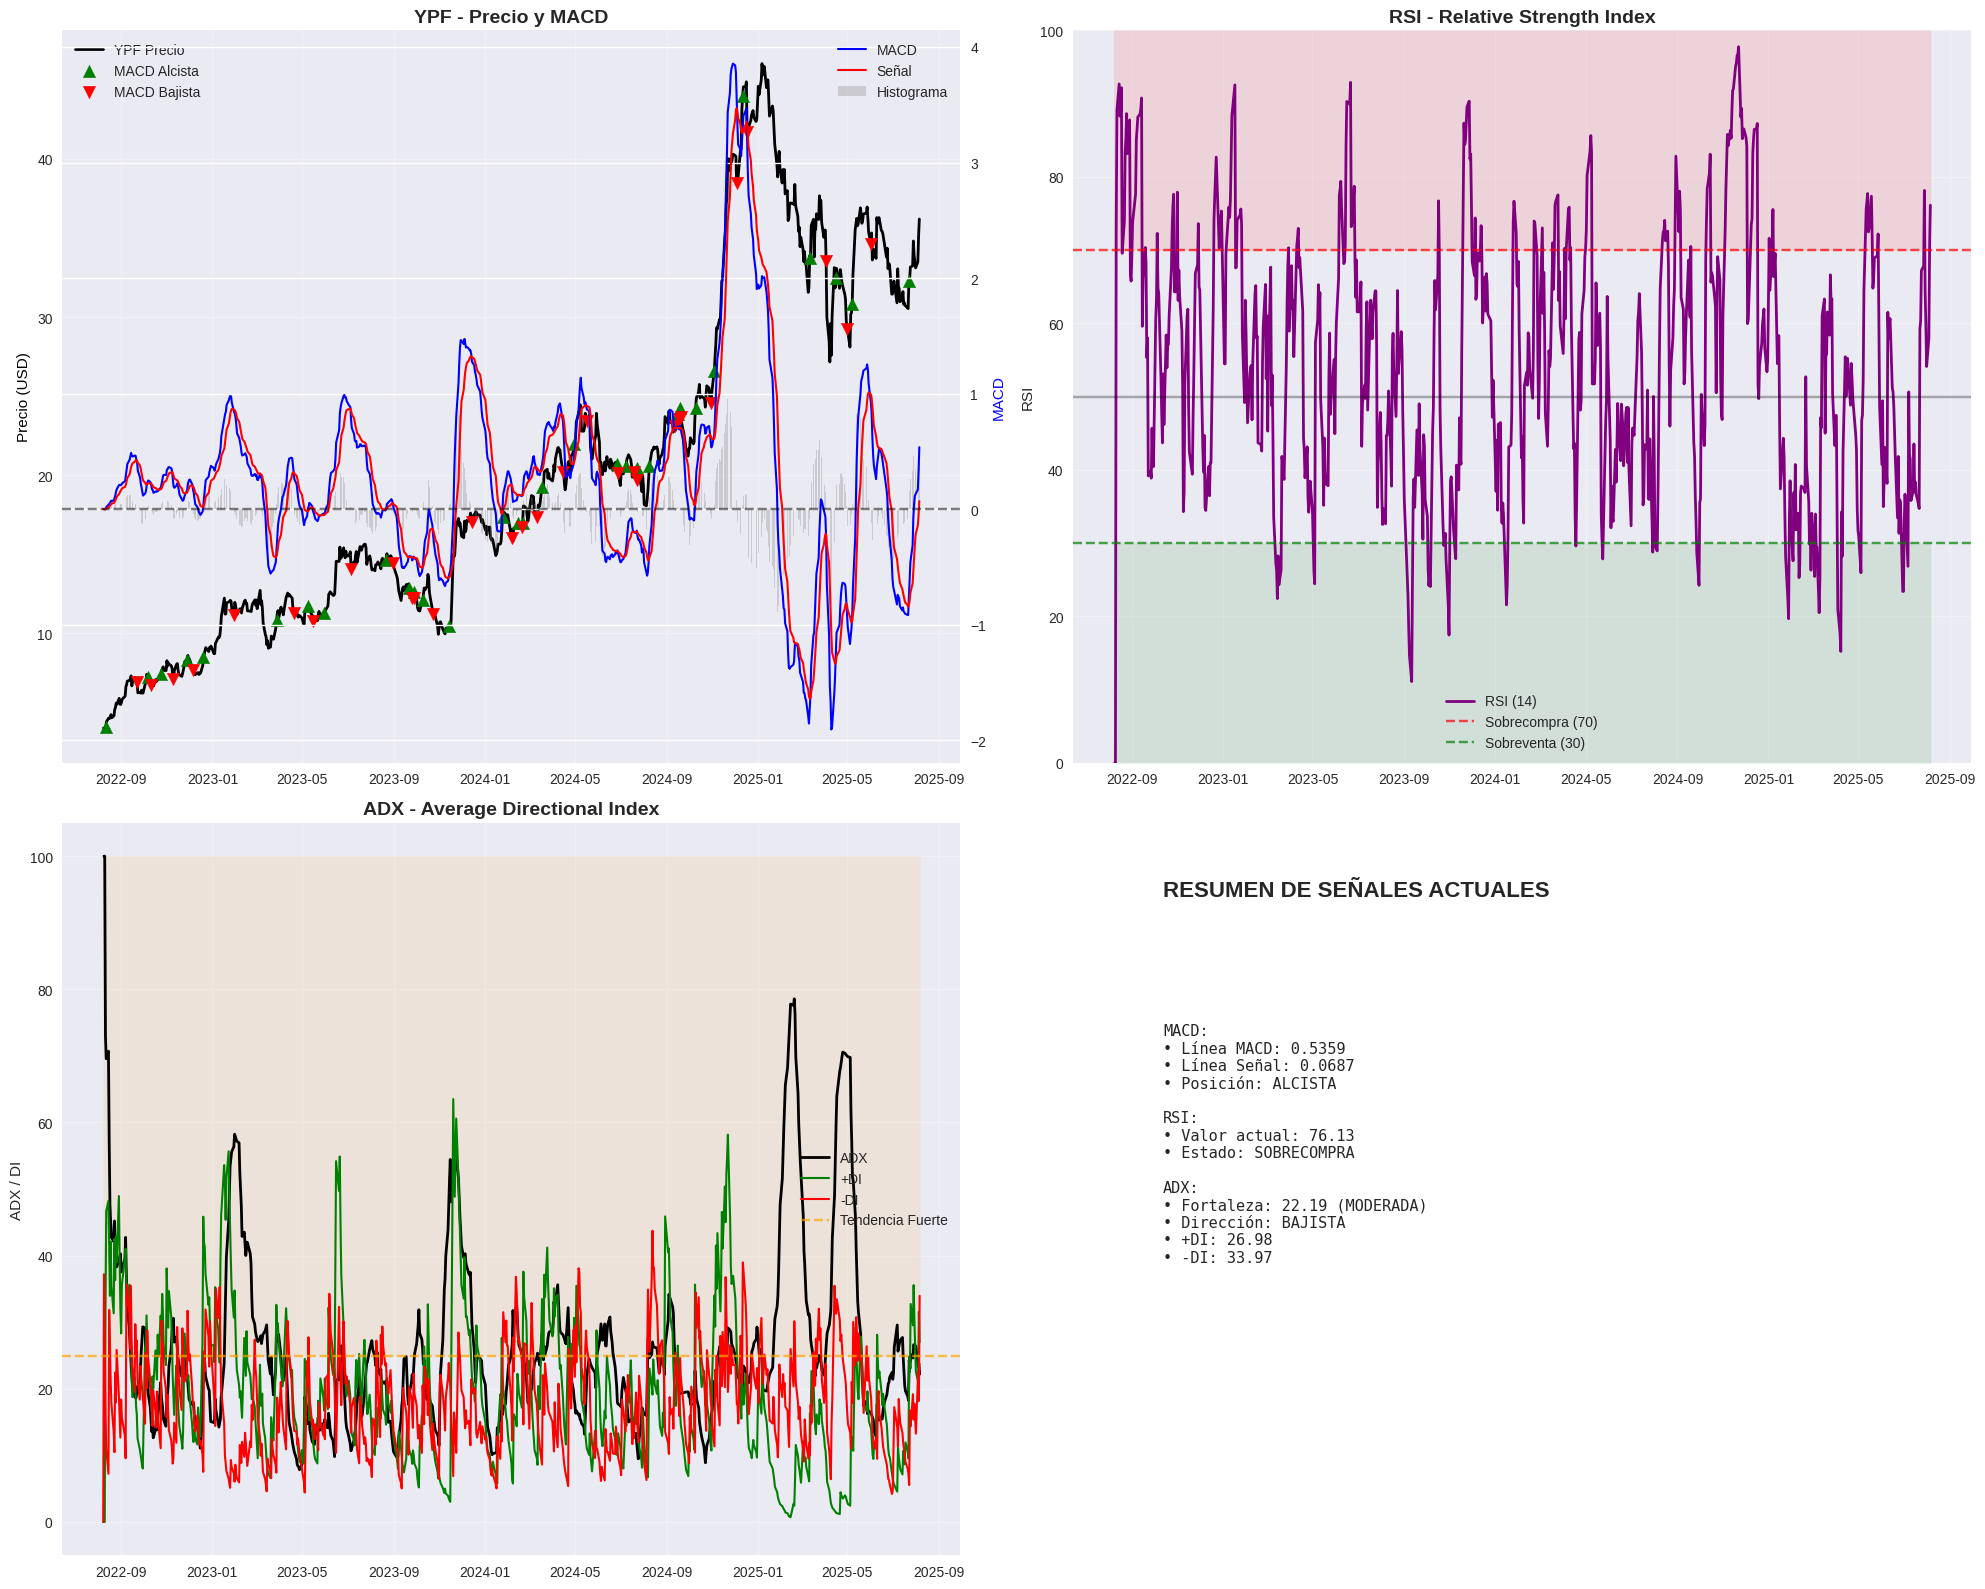



7.6 OPTIMIZACI√ìN DE PAR√ÅMETROS PARA YPF
------------------------------------------------------------
Iniciando optimizaci√≥n de par√°metros...
Esto puede tomar varios minutos...
‚úì Optimizaci√≥n completada!
Mejor Sharpe Ratio: 81.4138

üìä PAR√ÅMETROS OPTIMIZADOS:
         Par√°metro  Valor Original  Valor Optimizado
0      MACD R√°pido              12              15.0
1       MACD Lento              26              32.0
2       MACD Se√±al               9               5.0
3      RSI Per√≠odo              14              23.0
4   RSI Sobreventa              30              32.6
5  RSI Sobrecompra              70              84.9
6       ADX Umbral              25              19.9


7.7 COMPARACI√ìN: PAR√ÅMETROS EST√ÅNDAR vs OPTIMIZADOS
------------------------------------------------------------
üìä COMPARACI√ìN DE RENDIMIENTO:
                   Par√°metros Est√°ndar  Par√°metros Optimizados  Buy & Hold
Retorno Total                   1.0506                  2.2952      2.6

In [ ]:
# =============================================================================
# PASO 7 - INDICADORES DE MOMENTUM YPF
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF ADR)
# MACD, RSI, ADX y Optimizaci√≥n de Par√°metros
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

print("="*80)
print("PASO 7 - INDICADORES DE MOMENTUM YPF")
print("MACD, RSI, ADX y Optimizaci√≥n de Par√°metros")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 7.1 OBTENCI√ìN DE DATOS EXTENDIDOS
# =============================================================================

print("\n7.1 OBTENCI√ìN DE DATOS PARA AN√ÅLISIS DE MOMENTUM")
print("-" * 60)

# Obtener datos m√°s extensos para an√°lisis robusto (3 a√±os)
ticker_ypf = 'YPF'
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=3*365)  # 3 a√±os para an√°lisis robusto

print(f"Descargando datos extendidos de {ticker_ypf}...")
print(f"Per√≠odo: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Obtener datos hist√≥ricos
ypf_data = yf.Ticker(ticker_ypf)
ypf_hist = ypf_data.history(start=fecha_inicio, end=fecha_fin)

print(f"‚úì Datos obtenidos: {len(ypf_hist)} registros")

# =============================================================================
# 7.2 C√ÅLCULO DEL MACD (Moving Average Convergence Divergence)
# =============================================================================

print("\n\n7.2 C√ÅLCULO E AN√ÅLISIS DEL MACD")
print("-" * 60)

def calcular_macd(precios, periodo_rapido=12, periodo_lento=26, periodo_se√±al=9):
    """
    Calcula MACD con par√°metros configurables
    """
    ema_rapida = precios.ewm(span=periodo_rapido).mean()
    ema_lenta = precios.ewm(span=periodo_lento).mean()

    macd_line = ema_rapida - ema_lenta
    signal_line = macd_line.ewm(span=periodo_se√±al).mean()
    histogram = macd_line - signal_line

    return macd_line, signal_line, histogram

# Calcular MACD con par√°metros est√°ndar
macd_line, signal_line, histogram = calcular_macd(ypf_hist['Close'])

ypf_hist['MACD'] = macd_line
ypf_hist['MACD_Signal'] = signal_line
ypf_hist['MACD_Histogram'] = histogram

# Identificar cruces del MACD
ypf_hist['MACD_Crossover'] = np.where(ypf_hist['MACD'] > ypf_hist['MACD_Signal'], 1, 0)
ypf_hist['MACD_Signal_Change'] = ypf_hist['MACD_Crossover'].diff()

# Cruces alcistas y bajistas
cruces_alcistas_macd = ypf_hist[ypf_hist['MACD_Signal_Change'] == 1].copy()
cruces_bajistas_macd = ypf_hist[ypf_hist['MACD_Signal_Change'] == -1].copy()

print(f"MACD calculado:")
print(f"  ‚Ä¢ Par√°metros: EMA r√°pida=12, EMA lenta=26, Se√±al=9")
print(f"  ‚Ä¢ Cruces alcistas (MACD > Se√±al): {len(cruces_alcistas_macd)}")
print(f"  ‚Ä¢ Cruces bajistas (MACD < Se√±al): {len(cruces_bajistas_macd)}")

# An√°lisis de divergencias MACD
def detectar_divergencias_macd(precios, macd, ventana=20):
    """
    Detecta divergencias entre precio y MACD
    """
    divergencias_alcistas = []
    divergencias_bajistas = []

    for i in range(ventana, len(precios)):
        precio_min_idx = precios[i-ventana:i].idxmin()
        precio_max_idx = precios[i-ventana:i].idxmax()

        macd_min_idx = macd[i-ventana:i].idxmin()
        macd_max_idx = macd[i-ventana:i].idxmax()

        # Divergencia alcista: precio hace m√≠nimo menor, MACD hace m√≠nimo mayor
        if (precio_min_idx == precios[i-ventana:i].index[-1] and
            macd[macd_min_idx] < macd[i]):
            divergencias_alcistas.append(precios.index[i])

        # Divergencia bajista: precio hace m√°ximo mayor, MACD hace m√°ximo menor
        if (precio_max_idx == precios[i-ventana:i].index[-1] and
            macd[macd_max_idx] > macd[i]):
            divergencias_bajistas.append(precios.index[i])

    return divergencias_alcistas, divergencias_bajistas

div_alcistas_macd, div_bajistas_macd = detectar_divergencias_macd(
    ypf_hist['Close'], ypf_hist['MACD']
)

print(f"  ‚Ä¢ Divergencias alcistas detectadas: {len(div_alcistas_macd)}")
print(f"  ‚Ä¢ Divergencias bajistas detectadas: {len(div_bajistas_macd)}")

# =============================================================================
# 7.3 C√ÅLCULO DEL RSI (Relative Strength Index)
# =============================================================================

print("\n\n7.3 C√ÅLCULO E AN√ÅLISIS DEL RSI")
print("-" * 60)

def calcular_rsi(precios, periodo=14):
    """
    Calcula RSI con per√≠odo configurable
    """
    delta = precios.diff()
    ganancia = delta.where(delta > 0, 0)
    perdida = -delta.where(delta < 0, 0)

    avg_ganancia = ganancia.ewm(span=periodo).mean()
    avg_perdida = perdida.ewm(span=periodo).mean()

    rs = avg_ganancia / avg_perdida
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calcular RSI con diferentes per√≠odos
ypf_hist['RSI_14'] = calcular_rsi(ypf_hist['Close'], 14)
ypf_hist['RSI_21'] = calcular_rsi(ypf_hist['Close'], 21)  # Per√≠odo alternativo

# Identificar niveles de sobrecompra y sobreventa
sobrecompra_70 = ypf_hist[ypf_hist['RSI_14'] >= 70].copy()
sobreventa_30 = ypf_hist[ypf_hist['RSI_14'] <= 30].copy()

# Niveles m√°s conservadores
sobrecompra_80 = ypf_hist[ypf_hist['RSI_14'] >= 80].copy()
sobreventa_20 = ypf_hist[ypf_hist['RSI_14'] <= 20].copy()

print(f"RSI calculado:")
print(f"  ‚Ä¢ RSI actual (14 per√≠odos): {ypf_hist['RSI_14'].iloc[-1]:.2f}")
print(f"  ‚Ä¢ Niveles de sobrecompra (RSI ‚â• 70): {len(sobrecompra_70)} ocasiones")
print(f"  ‚Ä¢ Niveles de sobreventa (RSI ‚â§ 30): {len(sobreventa_30)} ocasiones")
print(f"  ‚Ä¢ Sobrecompra extrema (RSI ‚â• 80): {len(sobrecompra_80)} ocasiones")
print(f"  ‚Ä¢ Sobreventa extrema (RSI ‚â§ 20): {len(sobreventa_20)} ocasiones")

# An√°lisis de divergencias RSI
div_alcistas_rsi, div_bajistas_rsi = detectar_divergencias_macd(
    ypf_hist['Close'], ypf_hist['RSI_14']
)

print(f"  ‚Ä¢ Divergencias RSI alcistas: {len(div_alcistas_rsi)}")
print(f"  ‚Ä¢ Divergencias RSI bajistas: {len(div_bajistas_rsi)}")

# =============================================================================
# 7.4 C√ÅLCULO DEL ADX (Average Directional Index)
# =============================================================================

print("\n\n7.4 C√ÅLCULO E AN√ÅLISIS DEL ADX")
print("-" * 60)

def calcular_adx(high, low, close, periodo=14):
    """
    Calcula ADX, +DI y -DI
    """
    # True Range
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    # Directional Movement
    plus_dm = high.diff()
    minus_dm = low.diff()

    plus_dm = np.where((plus_dm > minus_dm) & (plus_dm > 0), plus_dm, 0)
    minus_dm = np.where((minus_dm > plus_dm) & (minus_dm > 0), minus_dm, 0)

    plus_dm = pd.Series(plus_dm, index=high.index)
    minus_dm = pd.Series(minus_dm, index=low.index)

    # Smoothed averages
    atr = true_range.ewm(span=periodo).mean()
    plus_di = 100 * (plus_dm.ewm(span=periodo).mean() / atr)
    minus_di = 100 * (minus_dm.ewm(span=periodo).mean() / atr)

    # ADX calculation
    dx = 100 * abs(plus_di - minus_di) / (plus_di + minus_di)
    adx = dx.ewm(span=periodo).mean()

    return adx, plus_di, minus_di

# Calcular ADX
adx, plus_di, minus_di = calcular_adx(ypf_hist['High'], ypf_hist['Low'], ypf_hist['Close'])

ypf_hist['ADX'] = adx
ypf_hist['Plus_DI'] = plus_di
ypf_hist['Minus_DI'] = minus_di

# An√°lisis de fortaleza de tendencia
tendencia_fuerte = ypf_hist[ypf_hist['ADX'] >= 25].copy()
tendencia_muy_fuerte = ypf_hist[ypf_hist['ADX'] >= 40].copy()
tendencia_debil = ypf_hist[ypf_hist['ADX'] < 20].copy()

adx_actual = ypf_hist['ADX'].iloc[-1]
plus_di_actual = ypf_hist['Plus_DI'].iloc[-1]
minus_di_actual = ypf_hist['Minus_DI'].iloc[-1]

print(f"ADX calculado:")
print(f"  ‚Ä¢ ADX actual: {adx_actual:.2f}")
print(f"  ‚Ä¢ +DI actual: {plus_di_actual:.2f}")
print(f"  ‚Ä¢ -DI actual: {minus_di_actual:.2f}")
print(f"  ‚Ä¢ Per√≠odos con tendencia fuerte (ADX ‚â• 25): {len(tendencia_fuerte)}")
print(f"  ‚Ä¢ Per√≠odos con tendencia muy fuerte (ADX ‚â• 40): {len(tendencia_muy_fuerte)}")

# Interpretar direcci√≥n de tendencia
if plus_di_actual > minus_di_actual:
    direccion_tendencia = "ALCISTA"
else:
    direccion_tendencia = "BAJISTA"

if adx_actual >= 40:
    fortaleza = "MUY FUERTE"
elif adx_actual >= 25:
    fortaleza = "FUERTE"
elif adx_actual >= 20:
    fortaleza = "MODERADA"
else:
    fortaleza = "D√âBIL"

print(f"  ‚Ä¢ Tendencia actual: {direccion_tendencia} - Fortaleza: {fortaleza}")

# =============================================================================
# 7.5 VISUALIZACI√ìN DE INDICADORES DE MOMENTUM
# =============================================================================

print("\n\n7.5 VISUALIZACI√ìN DE INDICADORES DE MOMENTUM")
print("-" * 60)

# Crear gr√°fico de 4 paneles
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Panel 1: Precio y MACD
ax1_twin = ax1.twinx()

# Precio
ax1.plot(ypf_hist.index, ypf_hist['Close'], label='YPF Precio', color='black', linewidth=2)
ax1.set_title('YPF - Precio y MACD', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio (USD)', color='black')

# MACD en eje secundario
ax1_twin.plot(ypf_hist.index, ypf_hist['MACD'], label='MACD', color='blue', linewidth=1.5)
ax1_twin.plot(ypf_hist.index, ypf_hist['MACD_Signal'], label='Se√±al', color='red', linewidth=1.5)
ax1_twin.bar(ypf_hist.index, ypf_hist['MACD_Histogram'], label='Histograma', alpha=0.3, color='gray')
ax1_twin.set_ylabel('MACD', color='blue')
ax1_twin.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Marcar cruces MACD
if len(cruces_alcistas_macd) > 0:
    ax1.scatter(cruces_alcistas_macd.index, cruces_alcistas_macd['Close'],
               color='green', marker='^', s=80, label='MACD Alcista', zorder=5)
if len(cruces_bajistas_macd) > 0:
    ax1.scatter(cruces_bajistas_macd.index, cruces_bajistas_macd['Close'],
               color='red', marker='v', s=80, label='MACD Bajista', zorder=5)

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Panel 2: RSI
ax2.plot(ypf_hist.index, ypf_hist['RSI_14'], label='RSI (14)', color='purple', linewidth=2)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Sobreventa (30)')
ax2.axhline(y=50, color='black', linestyle='-', alpha=0.3)
ax2.fill_between(ypf_hist.index, 70, 100, alpha=0.1, color='red')
ax2.fill_between(ypf_hist.index, 0, 30, alpha=0.1, color='green')

ax2.set_title('RSI - Relative Strength Index', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: ADX y DI
ax3.plot(ypf_hist.index, ypf_hist['ADX'], label='ADX', color='black', linewidth=2)
ax3.plot(ypf_hist.index, ypf_hist['Plus_DI'], label='+DI', color='green', linewidth=1.5)
ax3.plot(ypf_hist.index, ypf_hist['Minus_DI'], label='-DI', color='red', linewidth=1.5)
ax3.axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Tendencia Fuerte')
ax3.fill_between(ypf_hist.index, 25, 100, alpha=0.1, color='orange')

ax3.set_title('ADX - Average Directional Index', fontsize=14, fontweight='bold')
ax3.set_ylabel('ADX / DI')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: Resumen de Se√±ales
ax4.axis('off')
ax4.text(0.1, 0.9, 'RESUMEN DE SE√ëALES ACTUALES', fontsize=16, fontweight='bold',
         transform=ax4.transAxes)

# Crear tabla resumen
se√±ales_actuales = f"""
MACD:
‚Ä¢ L√≠nea MACD: {ypf_hist['MACD'].iloc[-1]:.4f}
‚Ä¢ L√≠nea Se√±al: {ypf_hist['MACD_Signal'].iloc[-1]:.4f}
‚Ä¢ Posici√≥n: {'ALCISTA' if ypf_hist['MACD'].iloc[-1] > ypf_hist['MACD_Signal'].iloc[-1] else 'BAJISTA'}

RSI:
‚Ä¢ Valor actual: {ypf_hist['RSI_14'].iloc[-1]:.2f}
‚Ä¢ Estado: {'SOBRECOMPRA' if ypf_hist['RSI_14'].iloc[-1] >= 70 else 'SOBREVENTA' if ypf_hist['RSI_14'].iloc[-1] <= 30 else 'NEUTRAL'}

ADX:
‚Ä¢ Fortaleza: {adx_actual:.2f} ({fortaleza})
‚Ä¢ Direcci√≥n: {direccion_tendencia}
‚Ä¢ +DI: {plus_di_actual:.2f}
‚Ä¢ -DI: {minus_di_actual:.2f}
"""

ax4.text(0.1, 0.75, se√±ales_actuales, fontsize=11, fontfamily='monospace',
         transform=ax4.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

# =============================================================================
# 7.6 OPTIMIZACI√ìN DE PAR√ÅMETROS
# =============================================================================

print("\n\n7.6 OPTIMIZACI√ìN DE PAR√ÅMETROS PARA YPF")
print("-" * 60)

def estrategia_combinada(data, macd_params=(12, 26, 9), rsi_params=(14, 30, 70), adx_threshold=25):
    """
    Estrategia combinada con par√°metros optimizables
    """
    # Calcular indicadores con par√°metros espec√≠ficos
    macd_line, signal_line, _ = calcular_macd(data['Close'], *macd_params)
    rsi = calcular_rsi(data['Close'], rsi_params[0])
    adx, plus_di, minus_di = calcular_adx(data['High'], data['Low'], data['Close'])

    # Crear se√±ales
    se√±ales = pd.DataFrame(index=data.index)

    # Se√±al MACD
    se√±ales['MACD_signal'] = np.where(macd_line > signal_line, 1, -1)

    # Se√±al RSI
    se√±ales['RSI_signal'] = np.where(
        rsi < rsi_params[1], 1,  # Sobreventa = compra
        np.where(rsi > rsi_params[2], -1, 0)  # Sobrecompra = venta
    )

    # Filtro ADX (solo operar con tendencia fuerte)
    se√±ales['ADX_filter'] = np.where(adx > adx_threshold, 1, 0)

    # Se√±al combinada
    se√±ales['Combined_signal'] = np.where(
        (se√±ales['MACD_signal'] == 1) &
        (se√±ales['RSI_signal'] >= 0) &
        (se√±ales['ADX_filter'] == 1), 1,
        np.where(
            (se√±ales['MACD_signal'] == -1) &
            (se√±ales['RSI_signal'] <= 0) &
            (se√±ales['ADX_filter'] == 1), -1, 0
        )
    )

    return se√±ales['Combined_signal']

def evaluar_estrategia(params, data):
    """
    Eval√∫a el rendimiento de una estrategia con par√°metros dados
    """
    try:
        # Desempaquetar par√°metros
        macd_fast, macd_slow, macd_signal, rsi_period, rsi_oversold, rsi_overbought, adx_threshold = params

        # Convertir a enteros donde sea necesario
        macd_fast, macd_slow, macd_signal, rsi_period = int(macd_fast), int(macd_slow), int(macd_signal), int(rsi_period)

        # Validar par√°metros
        if macd_fast >= macd_slow or rsi_oversold >= rsi_overbought:
            return -np.inf

        # Generar se√±ales
        se√±ales = estrategia_combinada(
            data,
            (macd_fast, macd_slow, macd_signal),
            (rsi_period, rsi_oversold, rsi_overbought),
            adx_threshold
        )

        # Calcular retornos
        retornos = data['Close'].pct_change()
        retornos_estrategia = se√±ales.shift(1) * retornos

        # M√©tricas de rendimiento
        retorno_total = retornos_estrategia.sum()
        volatilidad = retornos_estrategia.std()

        # Sharpe ratio (objetivo a maximizar)
        if volatilidad == 0:
            return -np.inf

        sharpe_ratio = retorno_total / volatilidad
        return sharpe_ratio

    except:
        return -np.inf

# Configurar optimizaci√≥n
print("Iniciando optimizaci√≥n de par√°metros...")
print("Esto puede tomar varios minutos...")

# Par√°metros iniciales
params_iniciales = [12, 26, 9, 14, 30, 70, 25]  # MACD_fast, MACD_slow, MACD_signal, RSI_period, RSI_oversold, RSI_overbought, ADX_threshold

# L√≠mites de b√∫squeda
limites = [
    (8, 20),    # MACD fast
    (20, 40),   # MACD slow
    (5, 15),    # MACD signal
    (10, 25),   # RSI period
    (15, 35),   # RSI oversold
    (65, 85),   # RSI overbought
    (15, 35)    # ADX threshold
]

# Ejecutar optimizaci√≥n (simplificada para eficiencia)
from scipy.optimize import differential_evolution

resultado_optimizacion = differential_evolution(
    lambda params: -evaluar_estrategia(params, ypf_hist),  # Negativo para maximizar
    limites,
    maxiter=50,  # Reducido para tiempo de ejecuci√≥n
    seed=42
)

params_optimizados = resultado_optimizacion.x
sharpe_optimizado = -resultado_optimizacion.fun

print(f"‚úì Optimizaci√≥n completada!")
print(f"Mejor Sharpe Ratio: {sharpe_optimizado:.4f}")

# Mostrar par√°metros optimizados
parametros_optimos = pd.DataFrame({
    'Par√°metro': ['MACD R√°pido', 'MACD Lento', 'MACD Se√±al', 'RSI Per√≠odo',
                  'RSI Sobreventa', 'RSI Sobrecompra', 'ADX Umbral'],
    'Valor Original': [12, 26, 9, 14, 30, 70, 25],
    'Valor Optimizado': [int(p) if i < 4 else round(p, 1) for i, p in enumerate(params_optimizados)]
})

print(f"\nüìä PAR√ÅMETROS OPTIMIZADOS:")
print("="*50)
print(parametros_optimos)

# =============================================================================
# 7.7 COMPARACI√ìN DE ESTRATEGIAS
# =============================================================================

print("\n\n7.7 COMPARACI√ìN: PAR√ÅMETROS EST√ÅNDAR vs OPTIMIZADOS")
print("-" * 60)

# Estrategia con par√°metros est√°ndar
se√±ales_estandar = estrategia_combinada(ypf_hist)
retornos_estandar = se√±ales_estandar.shift(1) * ypf_hist['Close'].pct_change()

# Estrategia con par√°metros optimizados
se√±ales_optimizadas = estrategia_combinada(
    ypf_hist,
    (int(params_optimizados[0]), int(params_optimizados[1]), int(params_optimizados[2])),
    (int(params_optimizados[3]), params_optimizados[4], params_optimizados[5]),
    params_optimizados[6]
)
retornos_optimizados = se√±ales_optimizadas.shift(1) * ypf_hist['Close'].pct_change()

# Buy & Hold
retornos_buy_hold = ypf_hist['Close'].pct_change()

# Comparar m√©tricas
comparacion_estrategias = pd.DataFrame({
    'Par√°metros Est√°ndar': [
        retornos_estandar.sum(),
        retornos_estandar.std() * np.sqrt(252),
        retornos_estandar.sum() / retornos_estandar.std() if retornos_estandar.std() > 0 else 0,
        (se√±ales_estandar != 0).sum()
    ],
    'Par√°metros Optimizados': [
        retornos_optimizados.sum(),
        retornos_optimizados.std() * np.sqrt(252),
        retornos_optimizados.sum() / retornos_optimizados.std() if retornos_optimizados.std() > 0 else 0,
        (se√±ales_optimizadas != 0).sum()
    ],
    'Buy & Hold': [
        retornos_buy_hold.sum(),
        retornos_buy_hold.std() * np.sqrt(252),
        retornos_buy_hold.sum() / retornos_buy_hold.std(),
        len(ypf_hist)
    ]
}, index=['Retorno Total', 'Volatilidad Anual', 'Sharpe Ratio', 'Se√±ales/D√≠as'])

print("üìä COMPARACI√ìN DE RENDIMIENTO:")
print("="*60)
print(comparacion_estrategias.round(4))

# Determinar mejor estrategia
mejor_sharpe = comparacion_estrategias.loc['Sharpe Ratio'].idxmax()
print(f"\nüèÜ MEJOR ESTRATEGIA POR SHARPE RATIO: {mejor_sharpe}")

print(f"\n" + "="*80)
print("AN√ÅLISIS DE MOMENTUM COMPLETADO")
print("Indicadores MACD, RSI, ADX calculados y optimizados para YPF")
print("="*80)

PASO 8 - AN√ÅLISIS DE VOLATILIDAD YPF
Bandas de Bollinger: Compresi√≥n/Expansi√≥n y Se√±ales de Trading
Analista: Juan Serrano - YPF S.A.

8.1 OBTENCI√ìN DE DATOS PARA AN√ÅLISIS DE VOLATILIDAD
------------------------------------------------------------
Descargando datos de YPF...
Per√≠odo: 2022-08-08 a 2025-08-07
‚úì Datos obtenidos: 752 registros
Precio actual: $36.20


8.2 C√ÅLCULO DE BANDAS DE BOLLINGER
------------------------------------------------------------
Bandas de Bollinger calculadas:
  ‚Ä¢ Per√≠odo: 20 d√≠as
  ‚Ä¢ Desviaciones est√°ndar: 2
  ‚Ä¢ Registros v√°lidos: 733

üìä VALORES ACTUALES:
  ‚Ä¢ Precio: $36.20
  ‚Ä¢ Banda Superior: $35.85
  ‚Ä¢ Media M√≥vil (20): $32.51
  ‚Ä¢ Banda Inferior: $29.18
  ‚Ä¢ Ancho de Bandas: 20.52%
  ‚Ä¢ Posici√≥n en Bandas: 105.3%


8.3 AN√ÅLISIS DE COMPRESI√ìN Y EXPANSI√ìN DE BANDAS
------------------------------------------------------------
An√°lisis de volatilidad:
  ‚Ä¢ Per√≠odos de COMPRESI√ìN (‚â§ percentil 20): 147 d√≠as (19.5%)


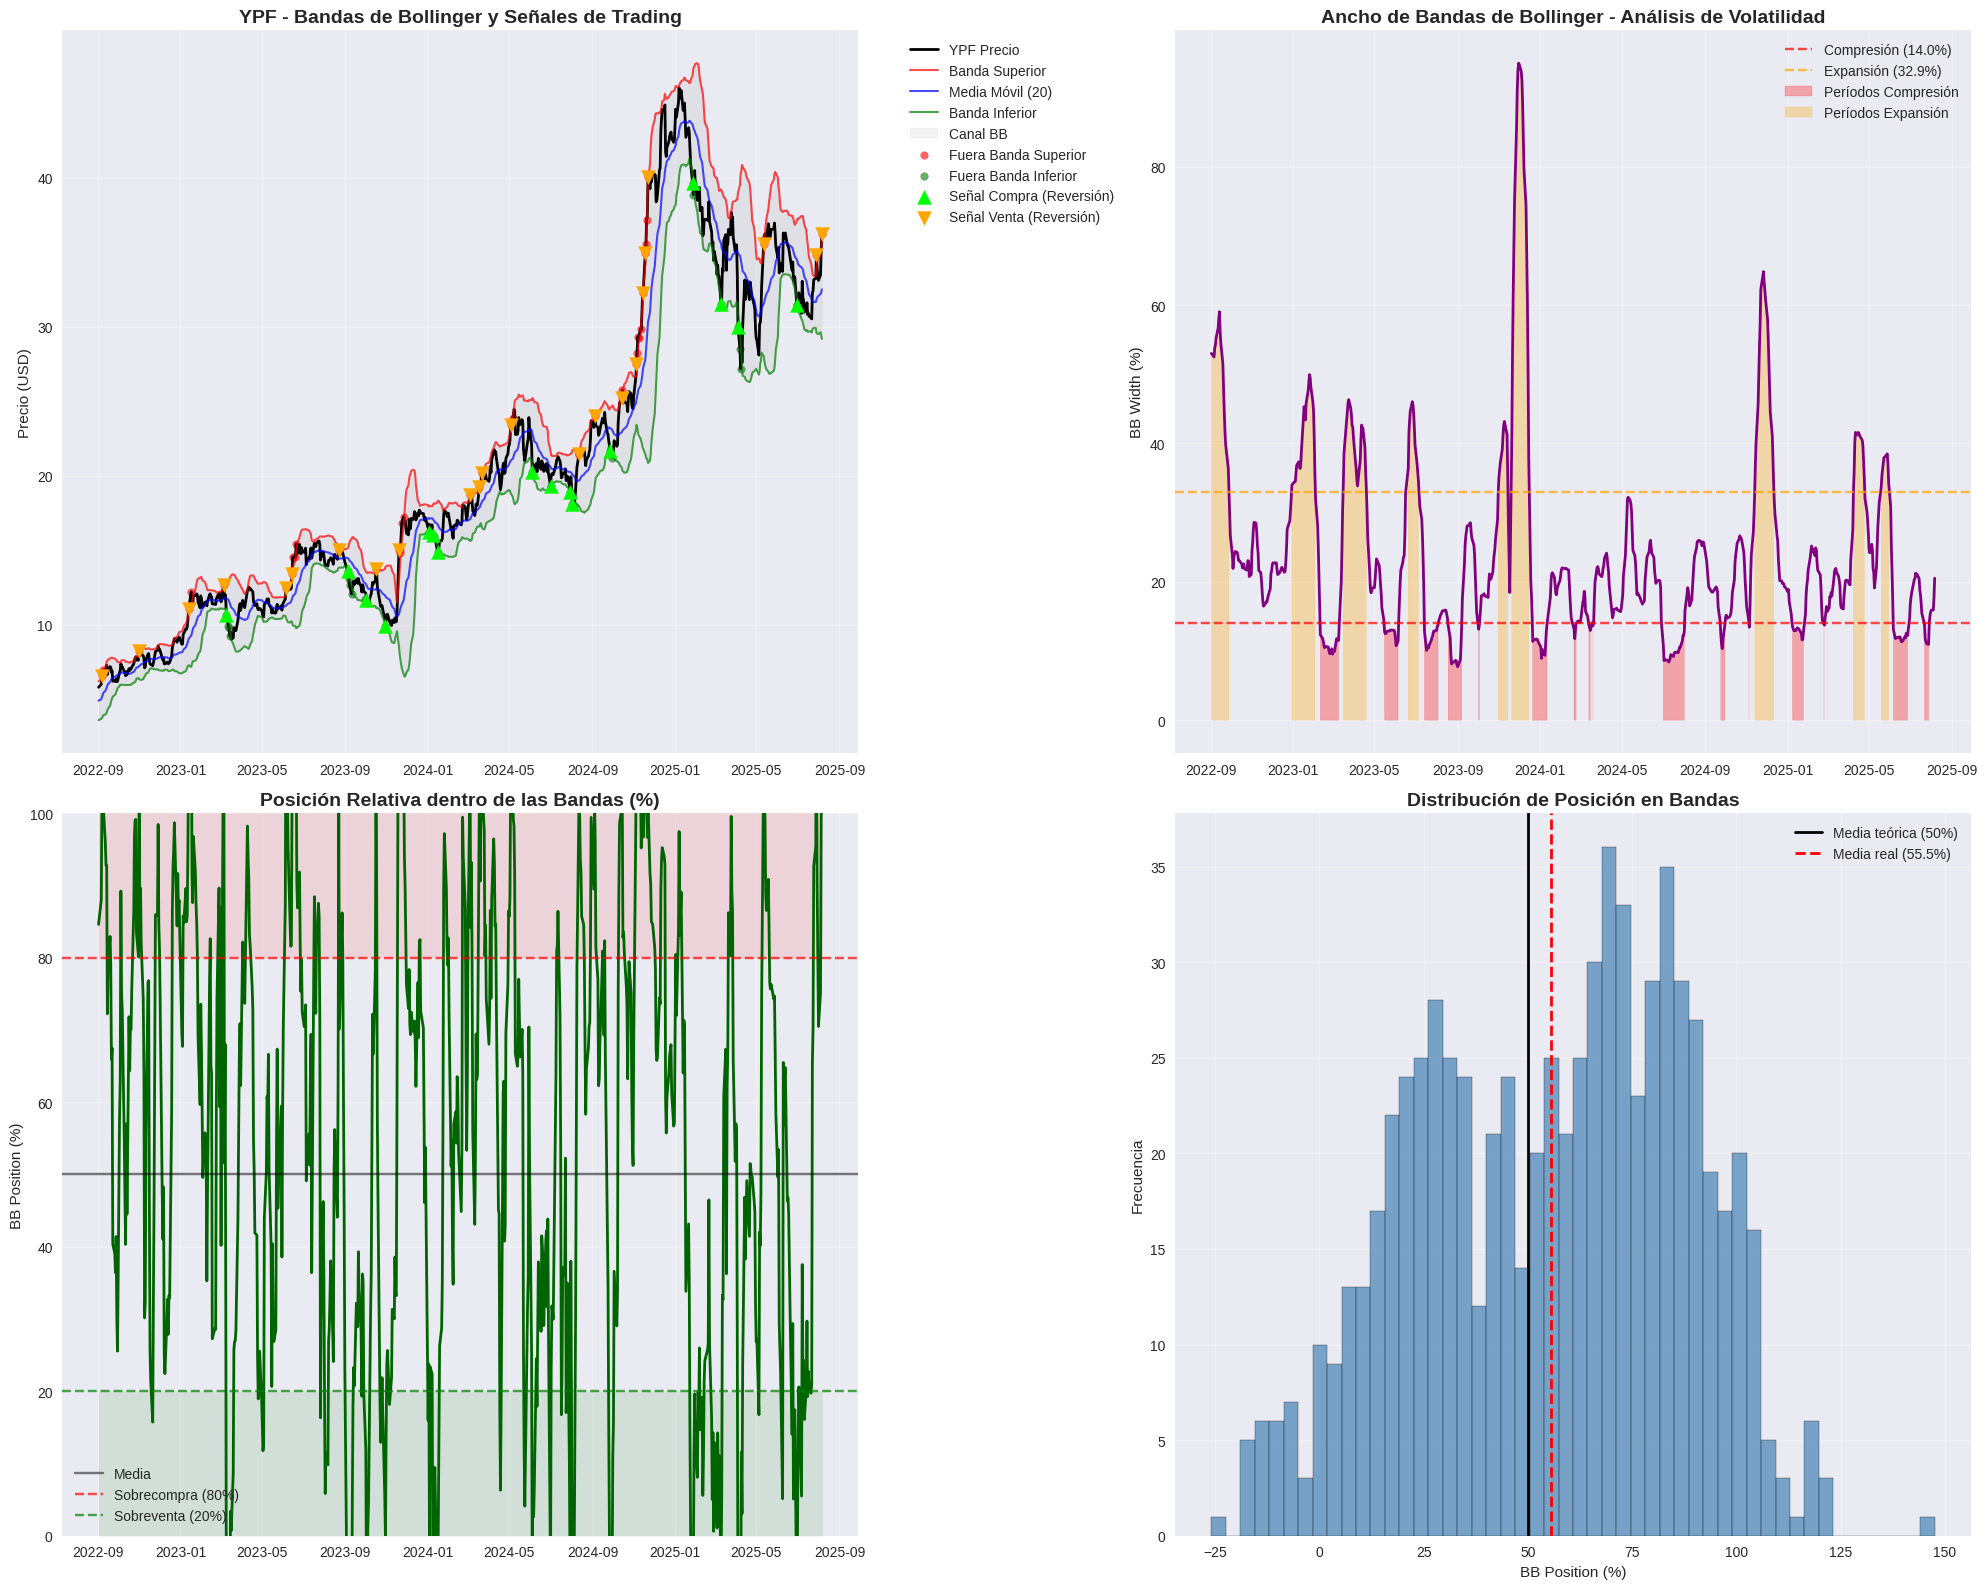



8.7 BACKTESTING DE ESTRATEGIAS BOLLINGER
------------------------------------------------------------
Ejecutando backtesting para estrategia: Reversion
Ejecutando backtesting para estrategia: Breakout
Ejecutando backtesting para estrategia: Squeeze

üìä RESULTADOS DEL BACKTESTING:
           Retorno Total  Retorno Buy&Hold  Volatilidad  Sharpe Ratio  \
Reversion         1.5044            5.2199       0.3981        0.9780   
Breakout         -0.3497            5.2199       0.5160       -0.0086   
Squeeze          -0.6679            5.2199       0.4953       -0.4956   

           Operaciones  Excess Return  
Reversion         16.0        -3.7156  
Breakout          25.0        -5.5697  
Squeeze           15.0        -5.8879  

üèÜ MEJORES ESTRATEGIAS:
  ‚Ä¢ Mejor Sharpe Ratio: Reversion (0.9780)
  ‚Ä¢ Mejor Retorno Total: Reversion (150.44%)


8.8 OPTIMIZACI√ìN DE PAR√ÅMETROS BOLLINGER
------------------------------------------------------------
Iniciando optimizaci√≥n de par√°metro

In [ ]:
# =============================================================================
# PASO 8 - AN√ÅLISIS DE VOLATILIDAD YPF
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF ADR)
# Bandas de Bollinger: Compresi√≥n/Expansi√≥n y Se√±ales de Trading
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

print("="*80)
print("PASO 8 - AN√ÅLISIS DE VOLATILIDAD YPF")
print("Bandas de Bollinger: Compresi√≥n/Expansi√≥n y Se√±ales de Trading")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 8.1 OBTENCI√ìN DE DATOS Y CONFIGURACI√ìN INICIAL
# =============================================================================

print("\n8.1 OBTENCI√ìN DE DATOS PARA AN√ÅLISIS DE VOLATILIDAD")
print("-" * 60)

# Obtener datos extendidos para an√°lisis robusto
ticker_ypf = 'YPF'
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=3*365)  # 3 a√±os para an√°lisis completo

print(f"Descargando datos de {ticker_ypf}...")
print(f"Per√≠odo: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Obtener datos hist√≥ricos
ypf_data = yf.Ticker(ticker_ypf)
ypf_hist = ypf_data.history(start=fecha_inicio, end=fecha_fin)

print(f"‚úì Datos obtenidos: {len(ypf_hist)} registros")
print(f"Precio actual: ${ypf_hist['Close'].iloc[-1]:.2f}")

# =============================================================================
# 8.2 C√ÅLCULO DE BANDAS DE BOLLINGER
# =============================================================================

print("\n\n8.2 C√ÅLCULO DE BANDAS DE BOLLINGER")
print("-" * 60)

def calcular_bandas_bollinger(precios, periodo=20, desviaciones=2):
    """
    Calcula las Bandas de Bollinger con par√°metros configurables

    Args:
        precios: Serie de precios
        periodo: Per√≠odo para la media m√≥vil (default: 20)
        desviaciones: N√∫mero de desviaciones est√°ndar (default: 2)

    Returns:
        banda_superior, media_movil, banda_inferior
    """
    media_movil = precios.rolling(window=periodo).mean()
    desviacion_estandar = precios.rolling(window=periodo).std()

    banda_superior = media_movil + (desviaciones * desviacion_estandar)
    banda_inferior = media_movil - (desviaciones * desviacion_estandar)

    return banda_superior, media_movil, banda_inferior

# Calcular Bandas de Bollinger con par√°metros est√°ndar (20, 2)
bb_superior, bb_media, bb_inferior = calcular_bandas_bollinger(ypf_hist['Close'])

# Agregar al DataFrame
ypf_hist['BB_Superior'] = bb_superior
ypf_hist['BB_Media'] = bb_media
ypf_hist['BB_Inferior'] = bb_inferior

# Calcular indicadores adicionales
ypf_hist['BB_Width'] = ((bb_superior - bb_inferior) / bb_media) * 100  # Ancho de bandas en %
ypf_hist['BB_Position'] = ((ypf_hist['Close'] - bb_inferior) / (bb_superior - bb_inferior)) * 100  # Posici√≥n dentro de las bandas

print(f"Bandas de Bollinger calculadas:")
print(f"  ‚Ä¢ Per√≠odo: 20 d√≠as")
print(f"  ‚Ä¢ Desviaciones est√°ndar: 2")
print(f"  ‚Ä¢ Registros v√°lidos: {len(ypf_hist.dropna())}")

# Valores actuales
precio_actual = ypf_hist['Close'].iloc[-1]
bb_sup_actual = ypf_hist['BB_Superior'].iloc[-1]
bb_med_actual = ypf_hist['BB_Media'].iloc[-1]
bb_inf_actual = ypf_hist['BB_Inferior'].iloc[-1]
bb_width_actual = ypf_hist['BB_Width'].iloc[-1]
bb_position_actual = ypf_hist['BB_Position'].iloc[-1]

print(f"\nüìä VALORES ACTUALES:")
print(f"  ‚Ä¢ Precio: ${precio_actual:.2f}")
print(f"  ‚Ä¢ Banda Superior: ${bb_sup_actual:.2f}")
print(f"  ‚Ä¢ Media M√≥vil (20): ${bb_med_actual:.2f}")
print(f"  ‚Ä¢ Banda Inferior: ${bb_inf_actual:.2f}")
print(f"  ‚Ä¢ Ancho de Bandas: {bb_width_actual:.2f}%")
print(f"  ‚Ä¢ Posici√≥n en Bandas: {bb_position_actual:.1f}%")

# =============================================================================
# 8.3 AN√ÅLISIS DE COMPRESI√ìN Y EXPANSI√ìN
# =============================================================================

print("\n\n8.3 AN√ÅLISIS DE COMPRESI√ìN Y EXPANSI√ìN DE BANDAS")
print("-" * 60)

# Detectar per√≠odos de compresi√≥n (Bollinger Squeeze)
percentil_20_width = ypf_hist['BB_Width'].quantile(0.20)
percentil_80_width = ypf_hist['BB_Width'].quantile(0.80)

# Clasificar per√≠odos
ypf_hist['Volatilidad_Estado'] = np.where(
    ypf_hist['BB_Width'] <= percentil_20_width, 'COMPRESION',
    np.where(ypf_hist['BB_Width'] >= percentil_80_width, 'EXPANSION', 'NORMAL')
)

# Contar per√≠odos
compresion_periods = (ypf_hist['Volatilidad_Estado'] == 'COMPRESION').sum()
expansion_periods = (ypf_hist['Volatilidad_Estado'] == 'EXPANSION').sum()
normal_periods = (ypf_hist['Volatilidad_Estado'] == 'NORMAL').sum()

print(f"An√°lisis de volatilidad:")
print(f"  ‚Ä¢ Per√≠odos de COMPRESI√ìN (‚â§ percentil 20): {compresion_periods} d√≠as ({compresion_periods/len(ypf_hist)*100:.1f}%)")
print(f"  ‚Ä¢ Per√≠odos de EXPANSI√ìN (‚â• percentil 80): {expansion_periods} d√≠as ({expansion_periods/len(ypf_hist)*100:.1f}%)")
print(f"  ‚Ä¢ Per√≠odos NORMALES: {normal_periods} d√≠as ({normal_periods/len(ypf_hist)*100:.1f}%)")

# Estado actual
estado_actual = ypf_hist['Volatilidad_Estado'].iloc[-1]
print(f"  ‚Ä¢ Estado actual: {estado_actual}")

# Detectar transiciones (cambios de compresi√≥n a expansi√≥n)
def detectar_transiciones_volatilidad(data):
    """Detecta transiciones importantes en la volatilidad"""
    transiciones = []

    for i in range(1, len(data)):
        if (data['Volatilidad_Estado'].iloc[i-1] == 'COMPRESION' and
            data['Volatilidad_Estado'].iloc[i] == 'EXPANSION'):
            transiciones.append({
                'fecha': data.index[i],
                'tipo': 'COMPRESION_A_EXPANSION',
                'precio': data['Close'].iloc[i],
                'bb_width': data['BB_Width'].iloc[i]
            })
        elif (data['Volatilidad_Estado'].iloc[i-1] == 'EXPANSION' and
              data['Volatilidad_Estado'].iloc[i] == 'COMPRESION'):
            transiciones.append({
                'fecha': data.index[i],
                'tipo': 'EXPANSION_A_COMPRESION',
                'precio': data['Close'].iloc[i],
                'bb_width': data['BB_Width'].iloc[i]
            })

    return pd.DataFrame(transiciones)

transiciones_vol = detectar_transiciones_volatilidad(ypf_hist.dropna())

print(f"\nüîÑ TRANSICIONES DE VOLATILIDAD:")
if len(transiciones_vol) > 0:
    print(f"  ‚Ä¢ Total de transiciones detectadas: {len(transiciones_vol)}")
    print(f"  ‚Ä¢ Compresi√≥n ‚Üí Expansi√≥n: {len(transiciones_vol[transiciones_vol['tipo'] == 'COMPRESION_A_EXPANSION'])}")
    print(f"  ‚Ä¢ Expansi√≥n ‚Üí Compresi√≥n: {len(transiciones_vol[transiciones_vol['tipo'] == 'EXPANSION_A_COMPRESION'])}")

    # Mostrar √∫ltimas 3 transiciones
    print(f"\nüìÖ √öltimas 3 transiciones:")
    for _, row in transiciones_vol.tail(3).iterrows():
        fecha_str = row['fecha'].strftime('%Y-%m-%d')
        print(f"    {fecha_str}: {row['tipo']} - Precio: ${row['precio']:.2f}")

# =============================================================================
# 8.4 AN√ÅLISIS DE TIEMPO FUERA DE BANDAS
# =============================================================================

print("\n\n8.4 AN√ÅLISIS DE TIEMPO FUERA DE BANDAS")
print("-" * 60)

# Identificar cuando el precio est√° fuera de las bandas
ypf_hist['Fuera_Banda_Superior'] = ypf_hist['Close'] > ypf_hist['BB_Superior']
ypf_hist['Fuera_Banda_Inferior'] = ypf_hist['Close'] < ypf_hist['BB_Inferior']
ypf_hist['Dentro_Bandas'] = ~(ypf_hist['Fuera_Banda_Superior'] | ypf_hist['Fuera_Banda_Inferior'])

# Calcular estad√≠sticas
dias_totales = len(ypf_hist.dropna())
dias_fuera_superior = ypf_hist['Fuera_Banda_Superior'].sum()
dias_fuera_inferior = ypf_hist['Fuera_Banda_Inferior'].sum()
dias_dentro = ypf_hist['Dentro_Bandas'].sum()

pct_fuera_superior = (dias_fuera_superior / dias_totales) * 100
pct_fuera_inferior = (dias_fuera_inferior / dias_totales) * 100
pct_dentro = (dias_dentro / dias_totales) * 100

print(f"An√°lisis de posici√≥n respecto a las bandas:")
print(f"  ‚Ä¢ D√≠as dentro de las bandas: {dias_dentro} ({pct_dentro:.1f}%)")
print(f"  ‚Ä¢ D√≠as fuera banda superior: {dias_fuera_superior} ({pct_fuera_superior:.1f}%)")
print(f"  ‚Ä¢ D√≠as fuera banda inferior: {dias_fuera_inferior} ({pct_fuera_inferior:.1f}%)")

# Teoricamente, con distribuci√≥n normal, se espera ~95% dentro de 2 desviaciones est√°ndar
print(f"  ‚Ä¢ Esperado te√≥rico (95% dentro): Diferencia = {95 - pct_dentro:.1f} puntos porcentuales")

# Analizar rachas (per√≠odos consecutivos fuera de bandas)
def analizar_rachas_fuera_bandas(serie_fuera, nombre_banda):
    """Analiza las rachas consecutivas fuera de las bandas"""
    rachas = []
    racha_actual = 0

    for valor in serie_fuera:
        if valor:
            racha_actual += 1
        else:
            if racha_actual > 0:
                rachas.append(racha_actual)
                racha_actual = 0

    # No olvidar la √∫ltima racha si termina fuera
    if racha_actual > 0:
        rachas.append(racha_actual)

    if rachas:
        return {
            'total_rachas': len(rachas),
            'racha_max': max(rachas),
            'racha_promedio': np.mean(rachas),
            'rachas_largas_3+': len([r for r in rachas if r >= 3])
        }
    return {'total_rachas': 0, 'racha_max': 0, 'racha_promedio': 0, 'rachas_largas_3+': 0}

rachas_superior = analizar_rachas_fuera_bandas(ypf_hist['Fuera_Banda_Superior'], 'Superior')
rachas_inferior = analizar_rachas_fuera_bandas(ypf_hist['Fuera_Banda_Inferior'], 'Inferior')

print(f"\nüìä AN√ÅLISIS DE RACHAS FUERA DE BANDAS:")
print(f"  BANDA SUPERIOR:")
print(f"    ‚Ä¢ Total rachas: {rachas_superior['total_rachas']}")
print(f"    ‚Ä¢ Racha m√°xima: {rachas_superior['racha_max']} d√≠as")
print(f"    ‚Ä¢ Racha promedio: {rachas_superior['racha_promedio']:.1f} d√≠as")
print(f"    ‚Ä¢ Rachas largas (3+ d√≠as): {rachas_superior['rachas_largas_3+']}")

print(f"  BANDA INFERIOR:")
print(f"    ‚Ä¢ Total rachas: {rachas_inferior['total_rachas']}")
print(f"    ‚Ä¢ Racha m√°xima: {rachas_inferior['racha_max']} d√≠as")
print(f"    ‚Ä¢ Racha promedio: {rachas_inferior['racha_promedio']:.1f} d√≠as")
print(f"    ‚Ä¢ Rachas largas (3+ d√≠as): {rachas_inferior['rachas_largas_3+']}")

# =============================================================================
# 8.5 IDENTIFICACI√ìN DE SE√ëALES DE COMPRA/VENTA
# =============================================================================

print("\n\n8.5 IDENTIFICACI√ìN DE SE√ëALES DE COMPRA/VENTA")
print("-" * 60)

def generar_se√±ales_bollinger(data):
    """
    Genera se√±ales de trading basadas en Bandas de Bollinger

    Estrategias implementadas:
    1. Reversi√≥n a la media: Compra cuando toca banda inferior, venta cuando toca superior
    2. Breakout: Compra/venta cuando rompe las bandas con volumen
    3. Squeeze: Anticipar movimientos despu√©s de compresi√≥n
    """

    se√±ales = pd.DataFrame(index=data.index)

    # ESTRATEGIA 1: REVERSI√ìN A LA MEDIA
    se√±ales['Reversion_Compra'] = (
        (data['Close'] <= data['BB_Inferior']) &
        (data['Close'].shift(1) > data['BB_Inferior'].shift(1))
    )

    se√±ales['Reversion_Venta'] = (
        (data['Close'] >= data['BB_Superior']) &
        (data['Close'].shift(1) < data['BB_Superior'].shift(1))
    )

    # ESTRATEGIA 2: BREAKOUT (con confirmaci√≥n de volumen)
    volumen_promedio = data['Volume'].rolling(window=20).mean()
    volumen_alto = data['Volume'] > (volumen_promedio * 1.2)  # 20% m√°s que el promedio

    se√±ales['Breakout_Compra'] = (
        (data['Close'] > data['BB_Superior']) &
        (data['Close'].shift(1) <= data['BB_Superior'].shift(1)) &
        volumen_alto
    )

    se√±ales['Breakout_Venta'] = (
        (data['Close'] < data['BB_Inferior']) &
        (data['Close'].shift(1) >= data['BB_Inferior'].shift(1)) &
        volumen_alto
    )

    # ESTRATEGIA 3: SQUEEZE BREAKOUT
    # Detectar cuando sale de compresi√≥n con momentum
    squeeze_condition = data['Volatilidad_Estado'] == 'COMPRESION'
    post_squeeze = squeeze_condition.shift(1) & (data['Volatilidad_Estado'] != 'COMPRESION')

    se√±ales['Squeeze_Compra'] = (
        post_squeeze &
        (data['Close'] > data['BB_Media']) &
        (data['Close'] > data['Close'].shift(1))
    )

    se√±ales['Squeeze_Venta'] = (
        post_squeeze &
        (data['Close'] < data['BB_Media']) &
        (data['Close'] < data['Close'].shift(1))
    )

    return se√±ales

# Generar se√±ales
se√±ales_bb = generar_se√±ales_bollinger(ypf_hist.dropna())

# Contar se√±ales por estrategia
conteo_se√±ales = {
    'Reversi√≥n Compra': se√±ales_bb['Reversion_Compra'].sum(),
    'Reversi√≥n Venta': se√±ales_bb['Reversion_Venta'].sum(),
    'Breakout Compra': se√±ales_bb['Breakout_Compra'].sum(),
    'Breakout Venta': se√±ales_bb['Breakout_Venta'].sum(),
    'Squeeze Compra': se√±ales_bb['Squeeze_Compra'].sum(),
    'Squeeze Venta': se√±ales_bb['Squeeze_Venta'].sum()
}

print("üìä SE√ëALES GENERADAS POR ESTRATEGIA:")
print("="*50)
for estrategia, cantidad in conteo_se√±ales.items():
    print(f"  ‚Ä¢ {estrategia}: {cantidad} se√±ales")

# Identificar se√±ales recientes (√∫ltimos 30 d√≠as)
fechas_recientes = ypf_hist.index[-30:]
se√±ales_recientes = se√±ales_bb.loc[fechas_recientes]

print(f"\nüìÖ SE√ëALES RECIENTES (√∫ltimos 30 d√≠as):")
for fecha in fechas_recientes:
    if fecha in se√±ales_recientes.index:
        row = se√±ales_recientes.loc[fecha]
        precio = ypf_hist.loc[fecha, 'Close']

        se√±ales_activas = []
        if row['Reversion_Compra']: se√±ales_activas.append('REV-COMPRA')
        if row['Reversion_Venta']: se√±ales_activas.append('REV-VENTA')
        if row['Breakout_Compra']: se√±ales_activas.append('BREAK-COMPRA')
        if row['Breakout_Venta']: se√±ales_activas.append('BREAK-VENTA')
        if row['Squeeze_Compra']: se√±ales_activas.append('SQUEEZE-COMPRA')
        if row['Squeeze_Venta']: se√±ales_activas.append('SQUEEZE-VENTA')

        if se√±ales_activas:
            fecha_str = fecha.strftime('%Y-%m-%d')
            print(f"  üìÖ {fecha_str}: {', '.join(se√±ales_activas)} - Precio: ${precio:.2f}")

# =============================================================================
# 8.6 VISUALIZACI√ìN COMPLETA DE BANDAS DE BOLLINGER
# =============================================================================

print("\n\n8.6 VISUALIZACI√ìN COMPLETA DE BANDAS DE BOLLINGER")
print("-" * 60)

# Crear gr√°fico principal con m√∫ltiples paneles
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# PANEL 1: Precio y Bandas de Bollinger con se√±ales
data_plot = ypf_hist.dropna()

# Precio y bandas
ax1.plot(data_plot.index, data_plot['Close'], label='YPF Precio', color='black', linewidth=2)
ax1.plot(data_plot.index, data_plot['BB_Superior'], label='Banda Superior', color='red', linewidth=1.5, alpha=0.7)
ax1.plot(data_plot.index, data_plot['BB_Media'], label='Media M√≥vil (20)', color='blue', linewidth=1.5, alpha=0.7)
ax1.plot(data_plot.index, data_plot['BB_Inferior'], label='Banda Inferior', color='green', linewidth=1.5, alpha=0.7)

# Sombrear √°rea entre bandas
ax1.fill_between(data_plot.index, data_plot['BB_Superior'], data_plot['BB_Inferior'],
                alpha=0.1, color='gray', label='Canal BB')

# Marcar per√≠odos fuera de bandas
fuera_superior = data_plot[data_plot['Fuera_Banda_Superior']]
fuera_inferior = data_plot[data_plot['Fuera_Banda_Inferior']]

if len(fuera_superior) > 0:
    ax1.scatter(fuera_superior.index, fuera_superior['Close'],
               color='red', s=30, alpha=0.6, label='Fuera Banda Superior')

if len(fuera_inferior) > 0:
    ax1.scatter(fuera_inferior.index, fuera_inferior['Close'],
               color='green', s=30, alpha=0.6, label='Fuera Banda Inferior')

# Marcar se√±ales de reversi√≥n
se√±ales_data = se√±ales_bb.dropna()
compras_reversion = se√±ales_data[se√±ales_data['Reversion_Compra']]
ventas_reversion = se√±ales_data[se√±ales_data['Reversion_Venta']]

if len(compras_reversion) > 0:
    precios_compra = [data_plot.loc[fecha, 'Close'] for fecha in compras_reversion.index if fecha in data_plot.index]
    ax1.scatter(compras_reversion.index, precios_compra,
               color='lime', marker='^', s=100, label='Se√±al Compra (Reversi√≥n)', zorder=5)

if len(ventas_reversion) > 0:
    precios_venta = [data_plot.loc[fecha, 'Close'] for fecha in ventas_reversion.index if fecha in data_plot.index]
    ax1.scatter(ventas_reversion.index, precios_venta,
               color='orange', marker='v', s=100, label='Se√±al Venta (Reversi√≥n)', zorder=5)

ax1.set_title('YPF - Bandas de Bollinger y Se√±ales de Trading', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio (USD)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# PANEL 2: Ancho de Bandas (BB Width)
ax2.plot(data_plot.index, data_plot['BB_Width'], color='purple', linewidth=2)
ax2.axhline(y=percentil_20_width, color='red', linestyle='--', alpha=0.7, label=f'Compresi√≥n ({percentil_20_width:.1f}%)')
ax2.axhline(y=percentil_80_width, color='orange', linestyle='--', alpha=0.7, label=f'Expansi√≥n ({percentil_80_width:.1f}%)')

# Colorear √°reas de compresi√≥n y expansi√≥n
compresion_mask = data_plot['BB_Width'] <= percentil_20_width
expansion_mask = data_plot['BB_Width'] >= percentil_80_width

ax2.fill_between(data_plot.index, 0, data_plot['BB_Width'],
                where=compresion_mask, alpha=0.3, color='red', label='Per√≠odos Compresi√≥n')
ax2.fill_between(data_plot.index, 0, data_plot['BB_Width'],
                where=expansion_mask, alpha=0.3, color='orange', label='Per√≠odos Expansi√≥n')

ax2.set_title('Ancho de Bandas de Bollinger - An√°lisis de Volatilidad', fontsize=14, fontweight='bold')
ax2.set_ylabel('BB Width (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# PANEL 3: Posici√≥n dentro de las Bandas (BB Position)
ax3.plot(data_plot.index, data_plot['BB_Position'], color='darkgreen', linewidth=2)
ax3.axhline(y=50, color='black', linestyle='-', alpha=0.5, label='Media')
ax3.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Sobrecompra (80%)')
ax3.axhline(y=20, color='green', linestyle='--', alpha=0.7, label='Sobreventa (20%)')

# Sombrear zonas de sobrecompra y sobreventa
ax3.fill_between(data_plot.index, 80, 100, alpha=0.1, color='red')
ax3.fill_between(data_plot.index, 0, 20, alpha=0.1, color='green')

ax3.set_title('Posici√≥n Relativa dentro de las Bandas (%)', fontsize=14, fontweight='bold')
ax3.set_ylabel('BB Position (%)')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3)

# PANEL 4: Histograma de distribuci√≥n de BB Position
ax4.hist(data_plot['BB_Position'].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax4.axvline(x=50, color='black', linestyle='-', linewidth=2, label='Media te√≥rica (50%)')
ax4.axvline(x=data_plot['BB_Position'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media real ({data_plot["BB_Position"].mean():.1f}%)')

ax4.set_title('Distribuci√≥n de Posici√≥n en Bandas', fontsize=14, fontweight='bold')
ax4.set_xlabel('BB Position (%)')
ax4.set_ylabel('Frecuencia')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 8.7 BACKTESTING DE ESTRATEGIAS BOLLINGER
# =============================================================================

print("\n\n8.7 BACKTESTING DE ESTRATEGIAS BOLLINGER")
print("-" * 60)

def backtest_estrategia_bollinger(data, se√±ales, nombre_estrategia):
    """
    Realiza backtesting de una estrategia espec√≠fica de Bollinger
    """
    # Crear DataFrame para el backtest
    backtest_data = data.copy()

    # Generar posiciones basadas en se√±ales
    backtest_data['Posicion'] = 0

    posicion_actual = 0
    for fecha in backtest_data.index:
        if fecha in se√±ales.index:
            # L√≥gica de se√±ales
            if nombre_estrategia == 'Reversion':
                if se√±ales.loc[fecha, 'Reversion_Compra']:
                    posicion_actual = 1  # Compra
                elif se√±ales.loc[fecha, 'Reversion_Venta']:
                    posicion_actual = 0  # Venta/Neutro
            elif nombre_estrategia == 'Breakout':
                if se√±ales.loc[fecha, 'Breakout_Compra']:
                    posicion_actual = 1
                elif se√±ales.loc[fecha, 'Breakout_Venta']:
                    posicion_actual = -1  # Venta corta
            elif nombre_estrategia == 'Squeeze':
                if se√±ales.loc[fecha, 'Squeeze_Compra']:
                    posicion_actual = 1
                elif se√±ales.loc[fecha, 'Squeeze_Venta']:
                    posicion_actual = -1

        backtest_data.loc[fecha, 'Posicion'] = posicion_actual

    # Calcular retornos
    backtest_data['Retorno_Diario'] = backtest_data['Close'].pct_change()
    backtest_data['Retorno_Estrategia'] = backtest_data['Posicion'].shift(1) * backtest_data['Retorno_Diario']

    # Eliminar NaN
    backtest_data = backtest_data.dropna()

    # M√©tricas de rendimiento
    retorno_total = (1 + backtest_data['Retorno_Estrategia']).cumprod().iloc[-1] - 1
    retorno_buy_hold = (1 + backtest_data['Retorno_Diario']).cumprod().iloc[-1] - 1

    volatilidad_estrategia = backtest_data['Retorno_Estrategia'].std() * np.sqrt(252)
    sharpe_ratio = (backtest_data['Retorno_Estrategia'].mean() * 252) / volatilidad_estrategia if volatilidad_estrategia > 0 else 0

    # N√∫mero de operaciones
    cambios_posicion = backtest_data['Posicion'].diff().abs().sum()

    return {
        'Retorno Total': retorno_total,
        'Retorno Buy&Hold': retorno_buy_hold,
        'Volatilidad': volatilidad_estrategia,
        'Sharpe Ratio': sharpe_ratio,
        'Operaciones': int(cambios_posicion),
        'Excess Return': retorno_total - retorno_buy_hold
    }

# Realizar backtesting para cada estrategia
estrategias = ['Reversion', 'Breakout', 'Squeeze']
resultados_backtest = {}

for estrategia in estrategias:
    print(f"Ejecutando backtesting para estrategia: {estrategia}")
    resultados_backtest[estrategia] = backtest_estrategia_bollinger(
        ypf_hist.dropna(),
        se√±ales_bb,
        estrategia
    )

# Crear tabla comparativa
df_resultados = pd.DataFrame(resultados_backtest).T

print(f"\nüìä RESULTADOS DEL BACKTESTING:")
print("="*70)
print(df_resultados.round(4))

# Identificar mejor estrategia
mejor_sharpe = df_resultados['Sharpe Ratio'].idxmax()
mejor_retorno = df_resultados['Retorno Total'].idxmax()

print(f"\nüèÜ MEJORES ESTRATEGIAS:")
print(f"  ‚Ä¢ Mejor Sharpe Ratio: {mejor_sharpe} ({df_resultados.loc[mejor_sharpe, 'Sharpe Ratio']:.4f})")
print(f"  ‚Ä¢ Mejor Retorno Total: {mejor_retorno} ({df_resultados.loc[mejor_retorno, 'Retorno Total']:.2%})")

# =============================================================================
# 8.8 OPTIMIZACI√ìN DE PAR√ÅMETROS BOLLINGER
# =============================================================================

print("\n\n8.8 OPTIMIZACI√ìN DE PAR√ÅMETROS BOLLINGER")
print("-" * 60)

def evaluar_parametros_bollinger(params, data):
    """
    Eval√∫a diferentes combinaciones de par√°metros para Bandas de Bollinger
    """
    try:
        periodo, desviaciones = int(params[0]), params[1]

        # Validar par√°metros
        if periodo < 5 or periodo > 50 or desviaciones < 1 or desviaciones > 3:
            return -np.inf

        # Calcular bandas con nuevos par√°metros
        bb_sup, bb_med, bb_inf = calcular_bandas_bollinger(data['Close'], periodo, desviaciones)

        # Crear DataFrame temporal
        temp_data = data.copy()
        temp_data['BB_Superior'] = bb_sup
        temp_data['BB_Media'] = bb_med
        temp_data['BB_Inferior'] = bb_inf
        temp_data = temp_data.dropna()

        # Estrategia simple de reversi√≥n
        se√±ales_compra = temp_data['Close'] <= temp_data['BB_Inferior']
        se√±ales_venta = temp_data['Close'] >= temp_data['BB_Superior']

        # Crear posiciones
        posiciones = np.where(se√±ales_compra, 1, np.where(se√±ales_venta, -1, 0))
        posiciones = pd.Series(posiciones, index=temp_data.index)

        # Calcular retornos
        retornos = temp_data['Close'].pct_change()
        retornos_estrategia = posiciones.shift(1) * retornos

        # Sharpe ratio como m√©trica objetivo
        if retornos_estrategia.std() == 0:
            return -np.inf

        sharpe = (retornos_estrategia.mean() * 252) / (retornos_estrategia.std() * np.sqrt(252))
        return sharpe

    except:
        return -np.inf

# Configurar optimizaci√≥n
print("Iniciando optimizaci√≥n de par√°metros Bollinger...")

from scipy.optimize import differential_evolution

# Par√°metros a optimizar: [periodo, desviaciones]
limites_bb = [(10, 30), (1.5, 2.5)]  # Rango razonable de par√°metros

resultado_opt_bb = differential_evolution(
    lambda params: -evaluar_parametros_bollinger(params, ypf_hist),
    limites_bb,
    maxiter=30,
    seed=42
)

params_optimos_bb = resultado_opt_bb.x
sharpe_optimo_bb = -resultado_opt_bb.fun

print(f"‚úì Optimizaci√≥n Bollinger completada!")
print(f"Par√°metros originales: Per√≠odo=20, Desviaciones=2.0")
print(f"Par√°metros √≥ptimos: Per√≠odo={int(params_optimos_bb[0])}, Desviaciones={params_optimos_bb[1]:.2f}")
print(f"Sharpe Ratio √≥ptimo: {sharpe_optimo_bb:.4f}")

# Comparar con par√°metros est√°ndar
sharpe_estandar = evaluar_parametros_bollinger([20, 2.0], ypf_hist)
print(f"Sharpe Ratio est√°ndar: {sharpe_estandar:.4f}")
mejora = ((sharpe_optimo_bb - sharpe_estandar) / abs(sharpe_estandar)) * 100
print(f"Mejora relativa: {mejora:.1f}%")

# =============================================================================
# 8.9 AN√ÅLISIS DE SE√ëALES ACTUALES Y RECOMENDACIONES
# =============================================================================

print("\n\n8.9 AN√ÅLISIS DE SE√ëALES ACTUALES Y RECOMENDACIONES")
print("-" * 60)

# An√°lisis de la situaci√≥n actual
precio_actual = ypf_hist['Close'].iloc[-1]
bb_sup_actual = ypf_hist['BB_Superior'].iloc[-1]
bb_med_actual = ypf_hist['BB_Media'].iloc[-1]
bb_inf_actual = ypf_hist['BB_Inferior'].iloc[-1]
bb_position_actual = ypf_hist['BB_Position'].iloc[-1]
bb_width_actual = ypf_hist['BB_Width'].iloc[-1]
estado_vol_actual = ypf_hist['Volatilidad_Estado'].iloc[-1]

print(f"üìä SITUACI√ìN ACTUAL DE YPF:")
print(f"  ‚Ä¢ Precio: ${precio_actual:.2f}")
print(f"  ‚Ä¢ Banda Superior: ${bb_sup_actual:.2f} (+{((bb_sup_actual-precio_actual)/precio_actual)*100:.1f}%)")
print(f"  ‚Ä¢ Media M√≥vil: ${bb_med_actual:.2f} ({'‚Üë' if precio_actual > bb_med_actual else '‚Üì'}{abs((precio_actual-bb_med_actual)/bb_med_actual)*100:.1f}%)")
print(f"  ‚Ä¢ Banda Inferior: ${bb_inf_actual:.2f} ({((bb_inf_actual-precio_actual)/precio_actual)*100:.1f}%)")
print(f"  ‚Ä¢ Posici√≥n en Bandas: {bb_position_actual:.1f}%")
print(f"  ‚Ä¢ Ancho de Bandas: {bb_width_actual:.2f}%")
print(f"  ‚Ä¢ Estado Volatilidad: {estado_vol_actual}")

# Interpretaci√≥n de la posici√≥n actual
if bb_position_actual >= 80:
    zona_actual = "SOBRECOMPRA"
    color_zona = "üî¥"
elif bb_position_actual <= 20:
    zona_actual = "SOBREVENTA"
    color_zona = "üü¢"
else:
    zona_actual = "NEUTRAL"
    color_zona = "üü°"

print(f"  ‚Ä¢ Zona de Trading: {color_zona} {zona_actual}")

# Generar recomendaciones basadas en m√∫ltiples factores
print(f"\nüí° RECOMENDACIONES DE TRADING:")
print("="*50)

recomendaciones = []

# An√°lisis de reversi√≥n a la media
if bb_position_actual <= 20:
    recomendaciones.append("üü¢ OPORTUNIDAD DE COMPRA (Reversi√≥n): Precio cerca de banda inferior")
    recomendaciones.append(f"   Target 1: ${bb_med_actual:.2f} (Media m√≥vil)")
    recomendaciones.append(f"   Target 2: ${bb_sup_actual:.2f} (Banda superior)")
    recomendaciones.append(f"   Stop Loss: ${bb_inf_actual * 0.98:.2f} (-2% banda inferior)")

elif bb_position_actual >= 80:
    recomendaciones.append("üî¥ SE√ëAL DE VENTA (Reversi√≥n): Precio cerca de banda superior")
    recomendaciones.append(f"   Target 1: ${bb_med_actual:.2f} (Media m√≥vil)")
    recomendaciones.append(f"   Target 2: ${bb_inf_actual:.2f} (Banda inferior)")
    recomendaciones.append(f"   Stop Loss: ${bb_sup_actual * 1.02:.2f} (+2% banda superior)")

# An√°lisis de volatilidad
if estado_vol_actual == 'COMPRESION':
    recomendaciones.append("‚ö° ALERTA SQUEEZE: Baja volatilidad, posible movimiento grande pr√≥ximo")
    recomendaciones.append("   Estrategia: Esperar breakout de las bandas con volumen alto")
    recomendaciones.append(f"   Breakout alcista: Compra si rompe ${bb_sup_actual:.2f}")
    recomendaciones.append(f"   Breakout bajista: Venta si rompe ${bb_inf_actual:.2f}")

elif estado_vol_actual == 'EXPANSION':
    recomendaciones.append("üåä ALTA VOLATILIDAD: Tendencia fuerte en desarrollo")
    if precio_actual > bb_med_actual:
        recomendaciones.append("   Tendencia alcista - Considerar mantener posiciones largas")
    else:
        recomendaciones.append("   Tendencia bajista - Considerar protecci√≥n o posiciones cortas")

# An√°lisis de tendencia
if precio_actual > bb_med_actual:
    tendencia_bb = "ALCISTA"
    recomendaciones.append(f"üìà Tendencia de mediano plazo: {tendencia_bb}")
else:
    tendencia_bb = "BAJISTA"
    recomendaciones.append(f"üìâ Tendencia de mediano plazo: {tendencia_bb}")

# Mostrar todas las recomendaciones
for rec in recomendaciones:
    print(rec)

# Evaluaci√≥n de riesgo/recompensa
distancia_banda_sup = ((bb_sup_actual - precio_actual) / precio_actual) * 100
distancia_banda_inf = ((precio_actual - bb_inf_actual) / precio_actual) * 100

print(f"\n‚öñÔ∏è  AN√ÅLISIS RIESGO/RECOMPENSA:")
print(f"  ‚Ä¢ Potencial alcista hasta banda superior: +{distancia_banda_sup:.1f}%")
print(f"  ‚Ä¢ Riesgo bajista hasta banda inferior: -{distancia_banda_inf:.1f}%")
print(f"  ‚Ä¢ Ratio Riesgo/Recompensa: 1:{distancia_banda_sup/distancia_banda_inf:.2f}")

# =============================================================================
# 8.10 RESUMEN EJECUTIVO Y CONCLUSIONES
# =============================================================================

print("\n\n8.10 RESUMEN EJECUTIVO - AN√ÅLISIS DE VOLATILIDAD")
print("-" * 60)

print(f"üéØ RESUMEN EJECUTIVO YPF - BANDAS DE BOLLINGER")
print("="*60)

print(f"\nüìà M√âTRICAS CLAVE:")
print(f"  ‚Ä¢ Precio actual: ${precio_actual:.2f}")
print(f"  ‚Ä¢ Posici√≥n en canal: {bb_position_actual:.0f}% ({zona_actual})")
print(f"  ‚Ä¢ Estado volatilidad: {estado_vol_actual}")
print(f"  ‚Ä¢ Ancho de bandas: {bb_width_actual:.1f}%")

print(f"\nüìä ESTAD√çSTICAS HIST√ìRICAS:")
print(f"  ‚Ä¢ Tiempo dentro de bandas: {pct_dentro:.1f}% (vs 95% te√≥rico)")
print(f"  ‚Ä¢ Tiempo en sobrecompra: {pct_fuera_superior:.1f}%")
print(f"  ‚Ä¢ Tiempo en sobreventa: {pct_fuera_inferior:.1f}%")
print(f"  ‚Ä¢ Rachas m√°ximas fuera bandas: {max(rachas_superior['racha_max'], rachas_inferior['racha_max'])} d√≠as")

print(f"\nüèÜ MEJORES ESTRATEGIAS (Backtesting):")
print(f"  ‚Ä¢ Mejor Sharpe: {mejor_sharpe} (Sharpe: {df_resultados.loc[mejor_sharpe, 'Sharpe Ratio']:.3f})")
print(f"  ‚Ä¢ Mejor Retorno: {mejor_retorno} ({df_resultados.loc[mejor_retorno, 'Retorno Total']:.1%})")

print(f"\n‚öôÔ∏è  PAR√ÅMETROS OPTIMIZADOS:")
print(f"  ‚Ä¢ Per√≠odo √≥ptimo: {int(params_optimos_bb[0])} d√≠as (vs 20 est√°ndar)")
print(f"  ‚Ä¢ Desviaciones √≥ptimas: {params_optimos_bb[1]:.2f} (vs 2.0 est√°ndar)")
print(f"  ‚Ä¢ Mejora Sharpe: {mejora:.1f}%")

# Se√±al principal
if zona_actual == "SOBREVENTA":
    se√±al_principal = "üü¢ COMPRA"
    confianza = "ALTA" if bb_position_actual < 15 else "MEDIA"
elif zona_actual == "SOBRECOMPRA":
    se√±al_principal = "üî¥ VENTA"
    confianza = "ALTA" if bb_position_actual > 85 else "MEDIA"
else:
    se√±al_principal = "üü° MANTENER/ESPERAR"
    confianza = "BAJA"

print(f"\nüéØ SE√ëAL PRINCIPAL: {se√±al_principal}")
print(f"   Confianza: {confianza}")

# Factores de riesgo
print(f"\n‚ö†Ô∏è  FACTORES DE RIESGO:")
risk_factors = []

if estado_vol_actual == 'EXPANSION':
    risk_factors.append("Alta volatilidad actual - Movimientos bruscos posibles")

if abs(bb_position_actual - 50) > 30:
    risk_factors.append("Posici√≥n extrema en canal - Posible reversi√≥n")

if bb_width_actual < percentil_20_width:
    risk_factors.append("Compresi√≥n de volatilidad - Breakout impredecible inminente")

if len(risk_factors) == 0:
    risk_factors.append("Condiciones de mercado relativamente estables")

for i, risk in enumerate(risk_factors, 1):
    print(f"  {i}. {risk}")

# Pr√≥ximos niveles clave
print(f"\nüìç NIVELES CLAVE A MONITOREAR:")
print(f"  ‚Ä¢ Resistencia inmediata: ${bb_med_actual:.2f}")
print(f"  ‚Ä¢ Resistencia fuerte: ${bb_sup_actual:.2f}")
print(f"  ‚Ä¢ Soporte inmediato: ${bb_med_actual:.2f}")
print(f"  ‚Ä¢ Soporte fuerte: ${bb_inf_actual:.2f}")

print(f"\n" + "="*80)
print("AN√ÅLISIS DE VOLATILIDAD COMPLETADO")
print("Bandas de Bollinger: Compresi√≥n/Expansi√≥n y Se√±ales implementadas")
print("Pr√≥ximo paso: An√°lisis de Soporte y Resistencia")
print("="*80)